### Firstly, we need to download and change datasets. ###

In [1]:
import pandas as pd
train = pd.read_csv('/Users/alexander/АДВБ/hse-dab-naf-23/my_train.csv', sep=',')
train

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,NUM_CONSULTANT,AUTORIZATION_FLAG,id,ACTUAL_PRICE,location_zone_1,product_category_1
0,2016-12-19,504,37296,1.000000,0,0,0,0,258934,3328.855404,25,9912
1,2016-12-19,525,23165,1.000000,0,0,0,0,10099,3328.855404,54,9912
2,2016-12-19,1080,32411,0.350000,0,0,0,0,232092,3328.855404,189,3876
3,2016-12-19,1080,24002,1.000000,0,0,0,0,217478,3328.855404,189,9912
4,2016-12-19,657,37569,1.000000,0,0,0,0,54676,3328.855404,219,3876
...,...,...,...,...,...,...,...,...,...,...,...,...
271928,2019-12-02,1143,88983,0.491237,1,0,0,1,145956,1824.500000,39,9912
271929,2019-12-02,1034,88983,0.542515,1,0,0,1,145955,1824.500000,203,9912
271930,2019-12-02,798,88983,2.200000,1,0,0,1,145954,1824.500000,203,9912
271931,2019-12-02,1380,88983,1.000000,1,0,0,1,145964,2530.260000,219,9912


In [2]:
test = pd.read_csv('/Users/alexander/АДВБ/hse-dab-naf-23/my_test.csv', sep=',')
test

,period_dt,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,NUM_CONSULTANT,AUTORIZATION_FLAG,id,ACTUAL_PRICE,location_zone_1,product_category_1
0,2019-12-30,1162,22939,NaN,0,0,0,1,16,3649.0,189,3876
1,2019-12-30,1162,23162,NaN,0,0,0,1,7867,3799.0,189,9912
2,2019-12-16,1162,23163,NaN,0,0,0,1,8667,3799.0,189,9912
3,2019-12-23,798,23632,NaN,0,0,0,1,14835,3999.0,203,9912
4,2019-12-30,1347,23633,NaN,0,0,0,1,14959,3999.0,189,9912
...,...,...,...,...,...,...,...,...,...,...,...,...
588,2019-12-16,1326,139157,NaN,1,0,0,1,203996,2449.5,203,9912
589,2019-12-09,1347,139157,NaN,0,0,0,0,203997,4899.0,189,9912
590,2019-12-09,425,148040,NaN,0,0,0,1,204035,3549.0,203,3885
591,2019-12-09,525,148040,NaN,0,0,0,1,204037,3549.0,54,3885


In [3]:
import datetime as dt
train['period_dt'] = pd.to_datetime(train['period_dt'])
test['period_dt'] = pd.to_datetime(test['period_dt'])
train['period_dt'] = train['period_dt'].apply(lambda x: x.date())
test['period_dt'] = test['period_dt'].apply(lambda x: x.date())

In [4]:
train_ = train[['id', 'period_dt', 'location_id', 'location_zone_1', 'product_id', 'product_category_1', 'demand']].copy()
train_

,id,period_dt,location_id,location_zone_1,product_id,product_category_1,demand
0,258934,2016-12-19,504,25,37296,9912,1.000000
1,10099,2016-12-19,525,54,23165,9912,1.000000
2,232092,2016-12-19,1080,189,32411,3876,0.350000
3,217478,2016-12-19,1080,189,24002,9912,1.000000
4,54676,2016-12-19,657,219,37569,3876,1.000000
...,...,...,...,...,...,...,...
271928,145956,2019-12-02,1143,39,88983,9912,0.491237
271929,145955,2019-12-02,1034,203,88983,9912,0.542515
271930,145954,2019-12-02,798,203,88983,9912,2.200000
271931,145964,2019-12-02,1380,219,88983,9912,1.000000


In [5]:
test_ = test[['id', 'period_dt', 'location_id', 'location_zone_1', 'product_id', 'product_category_1', 'demand']].copy()
test_

,id,period_dt,location_id,location_zone_1,product_id,product_category_1,demand
0,16,2019-12-30,1162,189,22939,3876,NaN
1,7867,2019-12-30,1162,189,23162,9912,NaN
2,8667,2019-12-16,1162,189,23163,9912,NaN
3,14835,2019-12-23,798,203,23632,9912,NaN
4,14959,2019-12-30,1347,189,23633,9912,NaN
...,...,...,...,...,...,...,...
588,203996,2019-12-16,1326,203,139157,9912,NaN
589,203997,2019-12-09,1347,189,139157,9912,NaN
590,204035,2019-12-09,425,203,148040,3885,NaN
591,204037,2019-12-09,525,54,148040,3885,NaN


### First algorithm: we find the mean demand in the nearest shops and closest products in the interval 2019-11-17 -- 2019-12-02 and try to predict future demand based on this metrics. ###

In [6]:
train_3_weeks = train_[train_['period_dt'] >= (dt.date(2019, 12, 2))-dt.timedelta(days=14)]
train_3_weeks

,id,period_dt,location_id,location_zone_1,product_id,product_category_1,demand
265628,31260,2019-11-18,1328,54,29751,3876,1.000000
265629,80914,2019-11-18,1185,258,62265,9912,1.000000
265630,31259,2019-11-18,1281,203,29751,3876,1.000000
265631,31258,2019-11-18,525,54,29751,3876,2.275862
265632,158442,2019-11-18,1034,203,93134,3908,0.042017
...,...,...,...,...,...,...,...
271928,145956,2019-12-02,1143,39,88983,9912,0.491237
271929,145955,2019-12-02,1034,203,88983,9912,0.542515
271930,145954,2019-12-02,798,203,88983,9912,2.200000
271931,145964,2019-12-02,1380,219,88983,9912,1.000000


In [7]:
import numpy as np
test_['nearest_shops_demand'] = np.nan
test_['nearest_products_demand'] = np.nan
test_

,id,period_dt,location_id,location_zone_1,product_id,product_category_1,demand,nearest_shops_demand,nearest_products_demand
0,16,2019-12-30,1162,189,22939,3876,NaN,NaN,NaN
1,7867,2019-12-30,1162,189,23162,9912,NaN,NaN,NaN
2,8667,2019-12-16,1162,189,23163,9912,NaN,NaN,NaN
3,14835,2019-12-23,798,203,23632,9912,NaN,NaN,NaN
4,14959,2019-12-30,1347,189,23633,9912,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
588,203996,2019-12-16,1326,203,139157,9912,NaN,NaN,NaN
589,203997,2019-12-09,1347,189,139157,9912,NaN,NaN,NaN
590,204035,2019-12-09,425,203,148040,3885,NaN,NaN,NaN
591,204037,2019-12-09,525,54,148040,3885,NaN,NaN,NaN


In [8]:
for iter, row in test_.iterrows():
    product_locations = train_3_weeks[train_3_weeks['product_id'] == row['product_id']]
    if not product_locations[product_locations['location_zone_1'] == row['location_zone_1']].empty:
        product_locations = product_locations[product_locations['location_zone_1'] == row['location_zone_1']]
    test_.loc[iter, 'nearest_shops_demand'] = product_locations['demand'].mean()

    location_products = train_3_weeks[train_3_weeks['location_id'] == row['location_id']]
    if not location_products[location_products['product_category_1'] == row['product_category_1']].empty:
        location_products = location_products[location_products['product_category_1'] == row['product_category_1']]
    test_.loc[iter, 'nearest_products_demand'] = location_products['demand'].mean()

In [9]:
print(test_['nearest_shops_demand'].isnull().sum())
print(test_['nearest_products_demand'].isnull().sum())

155
0


In [10]:
test_['nearest_shops_demand'] = np.where(test_['nearest_shops_demand'].isnull(), test_['nearest_products_demand'], test_['nearest_shops_demand'])
test_['demand_3_weeks'] = 0.25 * test_['nearest_shops_demand'] + 0.75 * test_['nearest_products_demand']
test_['demand'] = test_['demand_3_weeks']

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 20, 10

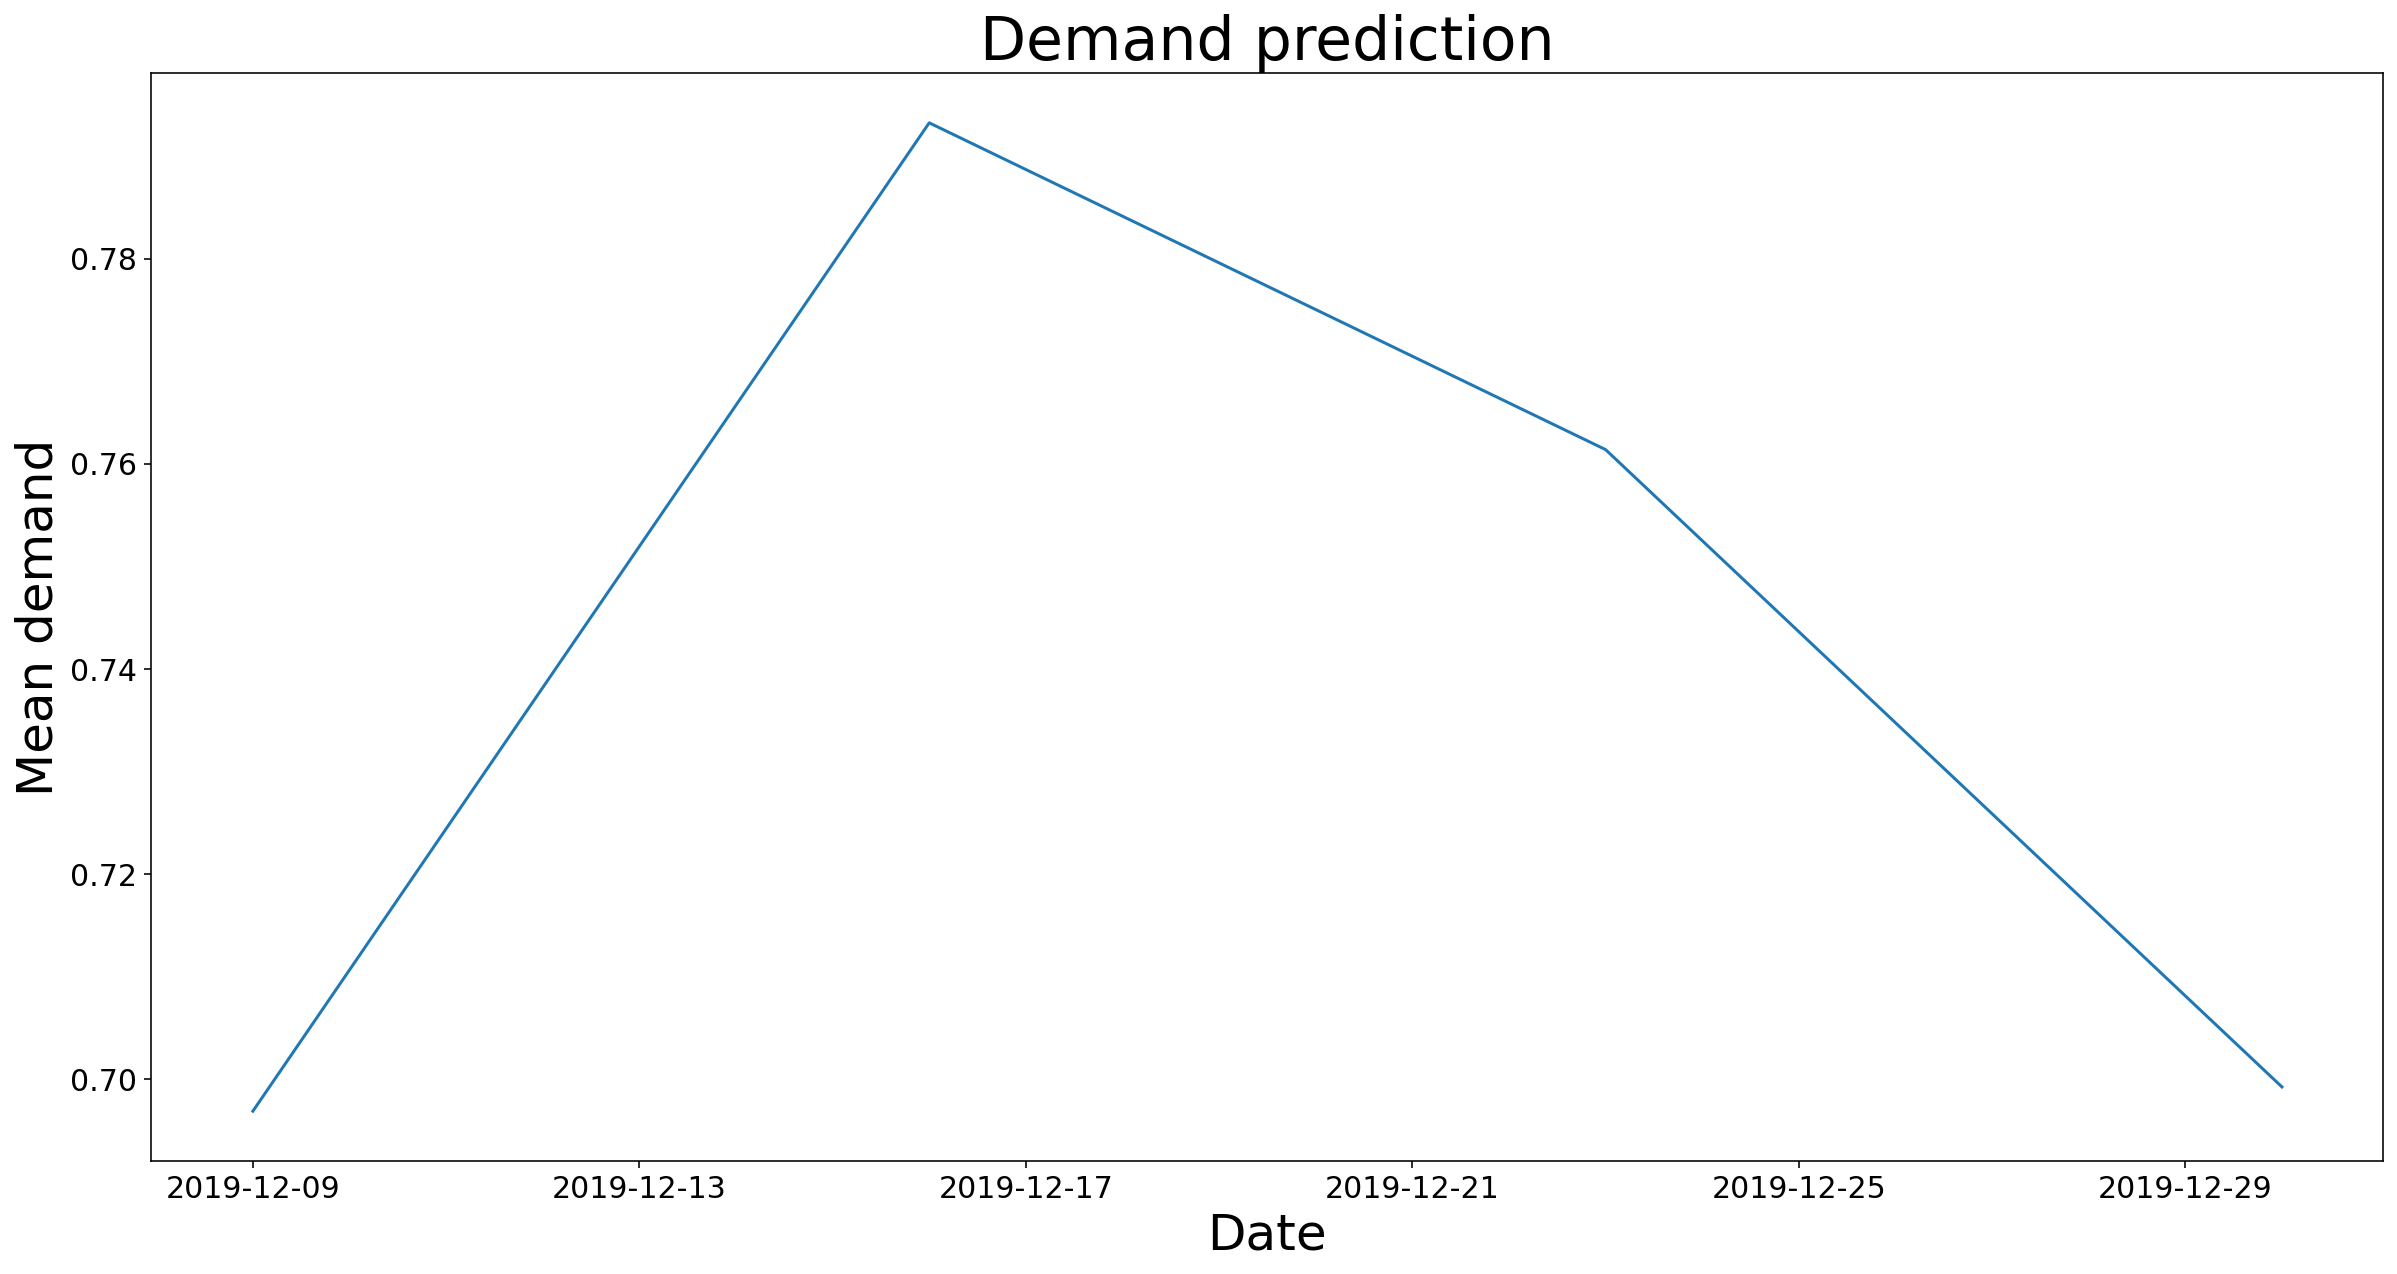

In [12]:
demand_prediction = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [13]:
test_['demand'] = test_['demand'].apply(lambda x: 0 if x < 0.25 else x)
test_['demand'] = test_['demand'].apply(lambda x: 1 if x >= 0.25 and x <= 1.75 else x)

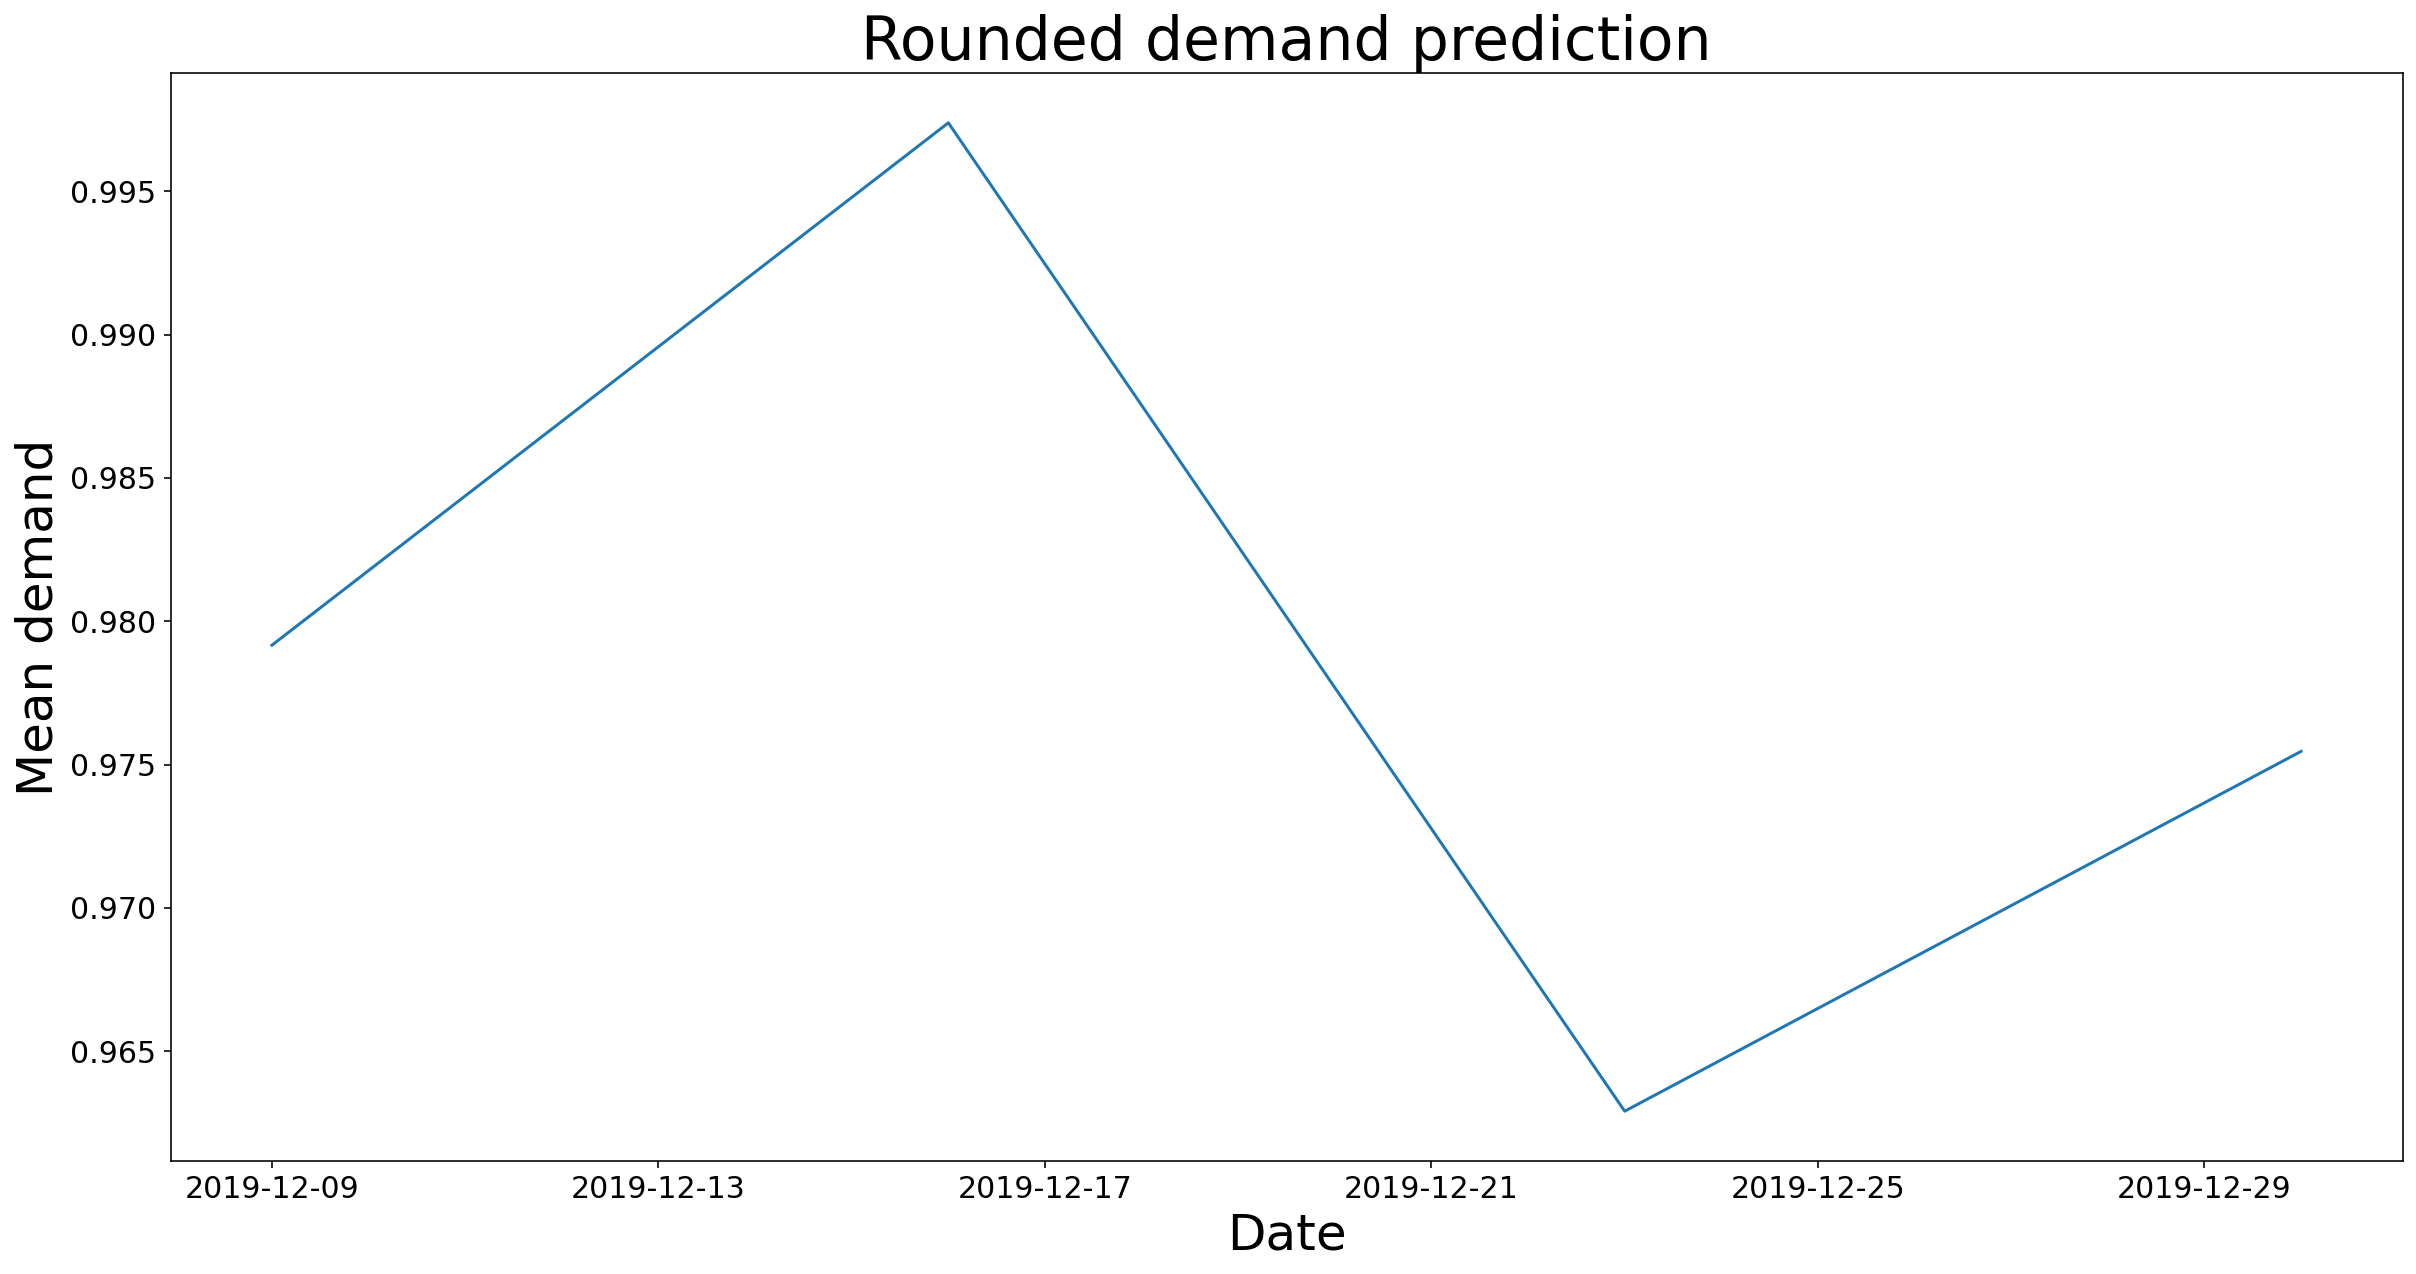

In [14]:
demand_prediction_rounded = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_rounded, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Rounded demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [15]:
test_['demand'] = np.where((test_['period_dt'] == dt.date(2019, 12, 16)) | (test_['period_dt'] == dt.date(2019, 12, 23)), np.maximum(1, test_['demand']), test_['demand'])

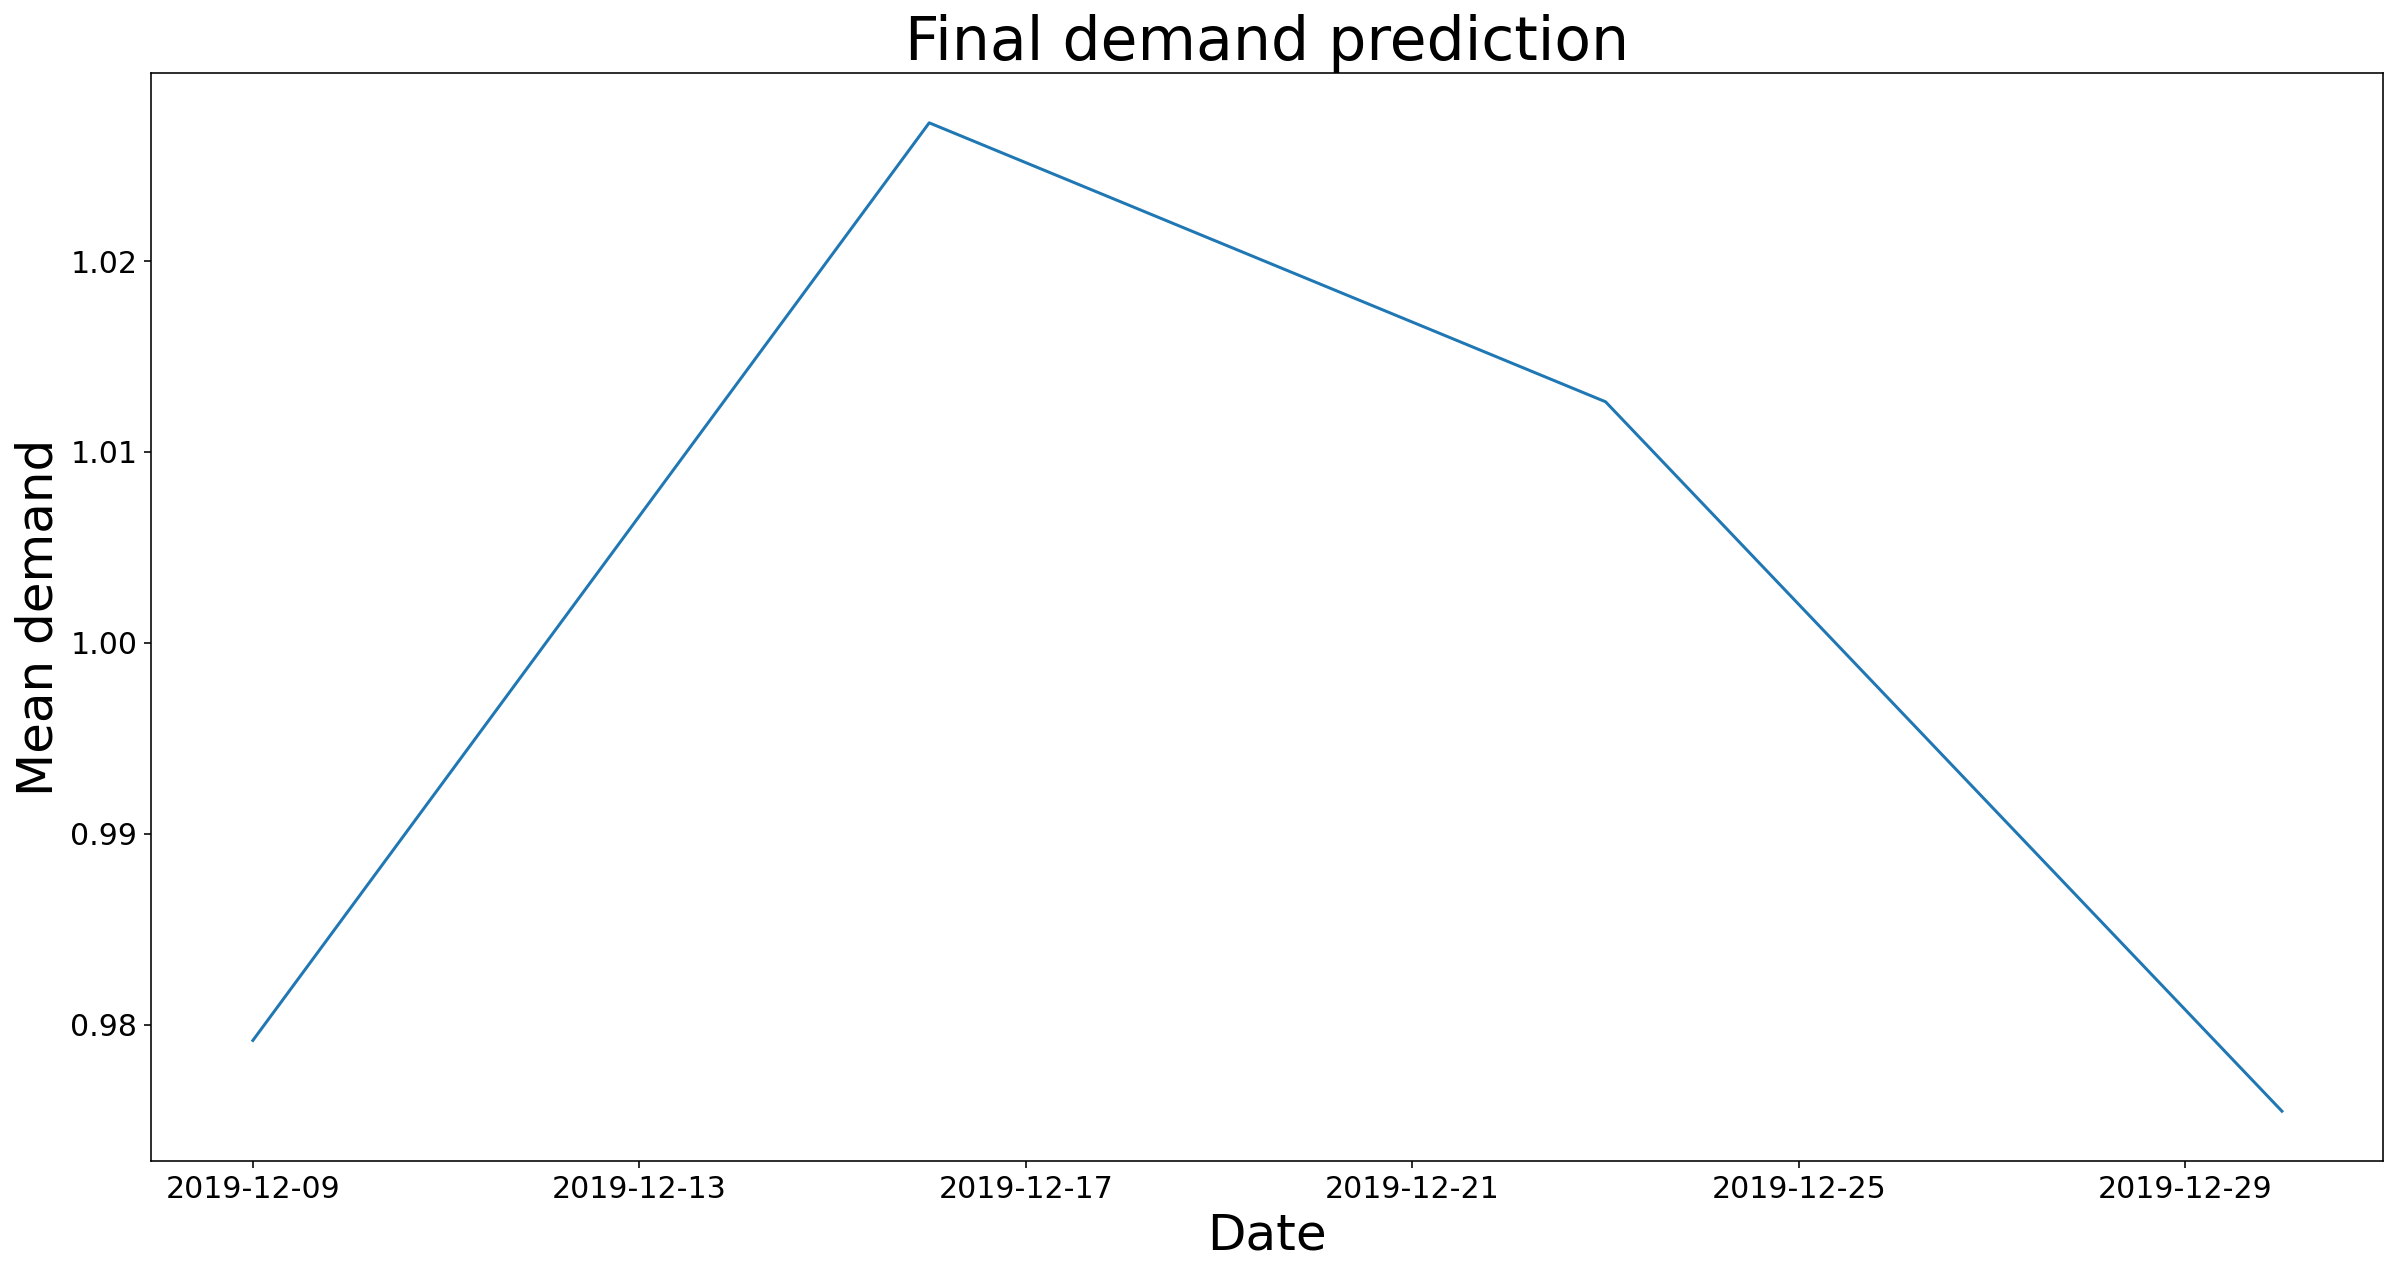

In [16]:
demand_prediction_final = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_final, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Final demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [17]:
answer_df = test_[['id', 'demand']]
answer_df.to_csv('out.csv', index=False)

### Let's try to make our model a bit harder. Now we want to add same metrics (demand in nearest shops and demand for closest products) for december 2018 and december 2017. ###

In [18]:
test_['nearest_shops_demand_2018'] = np.nan
test_['nearest_products_demand_2018'] = np.nan

In [19]:
train_december_2018 = train_[(train_['period_dt'] >= (dt.date(2018, 12, 1))) & (train_['period_dt'] <= (dt.date(2018, 12, 31)))]

In [20]:
for iter, row in test_.iterrows():
    closest_data = min(list(train_december_2018['period_dt'].unique()), key=lambda x: abs(x - row['period_dt']))
    product_locations_2018 = train_december_2018[(train_december_2018['product_id'] == row['product_id']) & 
                                                 (train_december_2018['period_dt'] == closest_data)]
    
    if not product_locations_2018[product_locations_2018['location_zone_1'] == row['location_zone_1']].empty:
        product_locations_2018 = product_locations_2018[product_locations_2018['location_zone_1'] == row['location_zone_1']]
    test_.loc[iter, 'nearest_shops_demand_2018'] = product_locations_2018['demand'].mean()

    location_products_2018 = train_december_2018[(train_december_2018['location_id'] == row['location_id']) & 
                                                 (train_december_2018['period_dt'] == closest_data)]
    if not location_products_2018[location_products_2018['product_category_1'] == row['product_category_1']].empty:
        location_products_2018 = location_products_2018[location_products_2018['product_category_1'] == row['product_category_1']]
    test_.loc[iter, 'nearest_products_demand_2018'] = location_products_2018['demand'].mean()

In [21]:
print(test_['nearest_shops_demand_2018'].isnull().sum())
print(test_['nearest_products_demand_2018'].isnull().sum())

410
0


In [22]:
test_['nearest_shops_demand_2018'] = np.where(test_['nearest_shops_demand_2018'].isnull(), test_['nearest_products_demand_2018'], test_['nearest_shops_demand_2018'])
test_['demand_2018'] = 0.5 * test_['nearest_shops_demand_2018'] + 0.5 * test_['nearest_products_demand_2018']

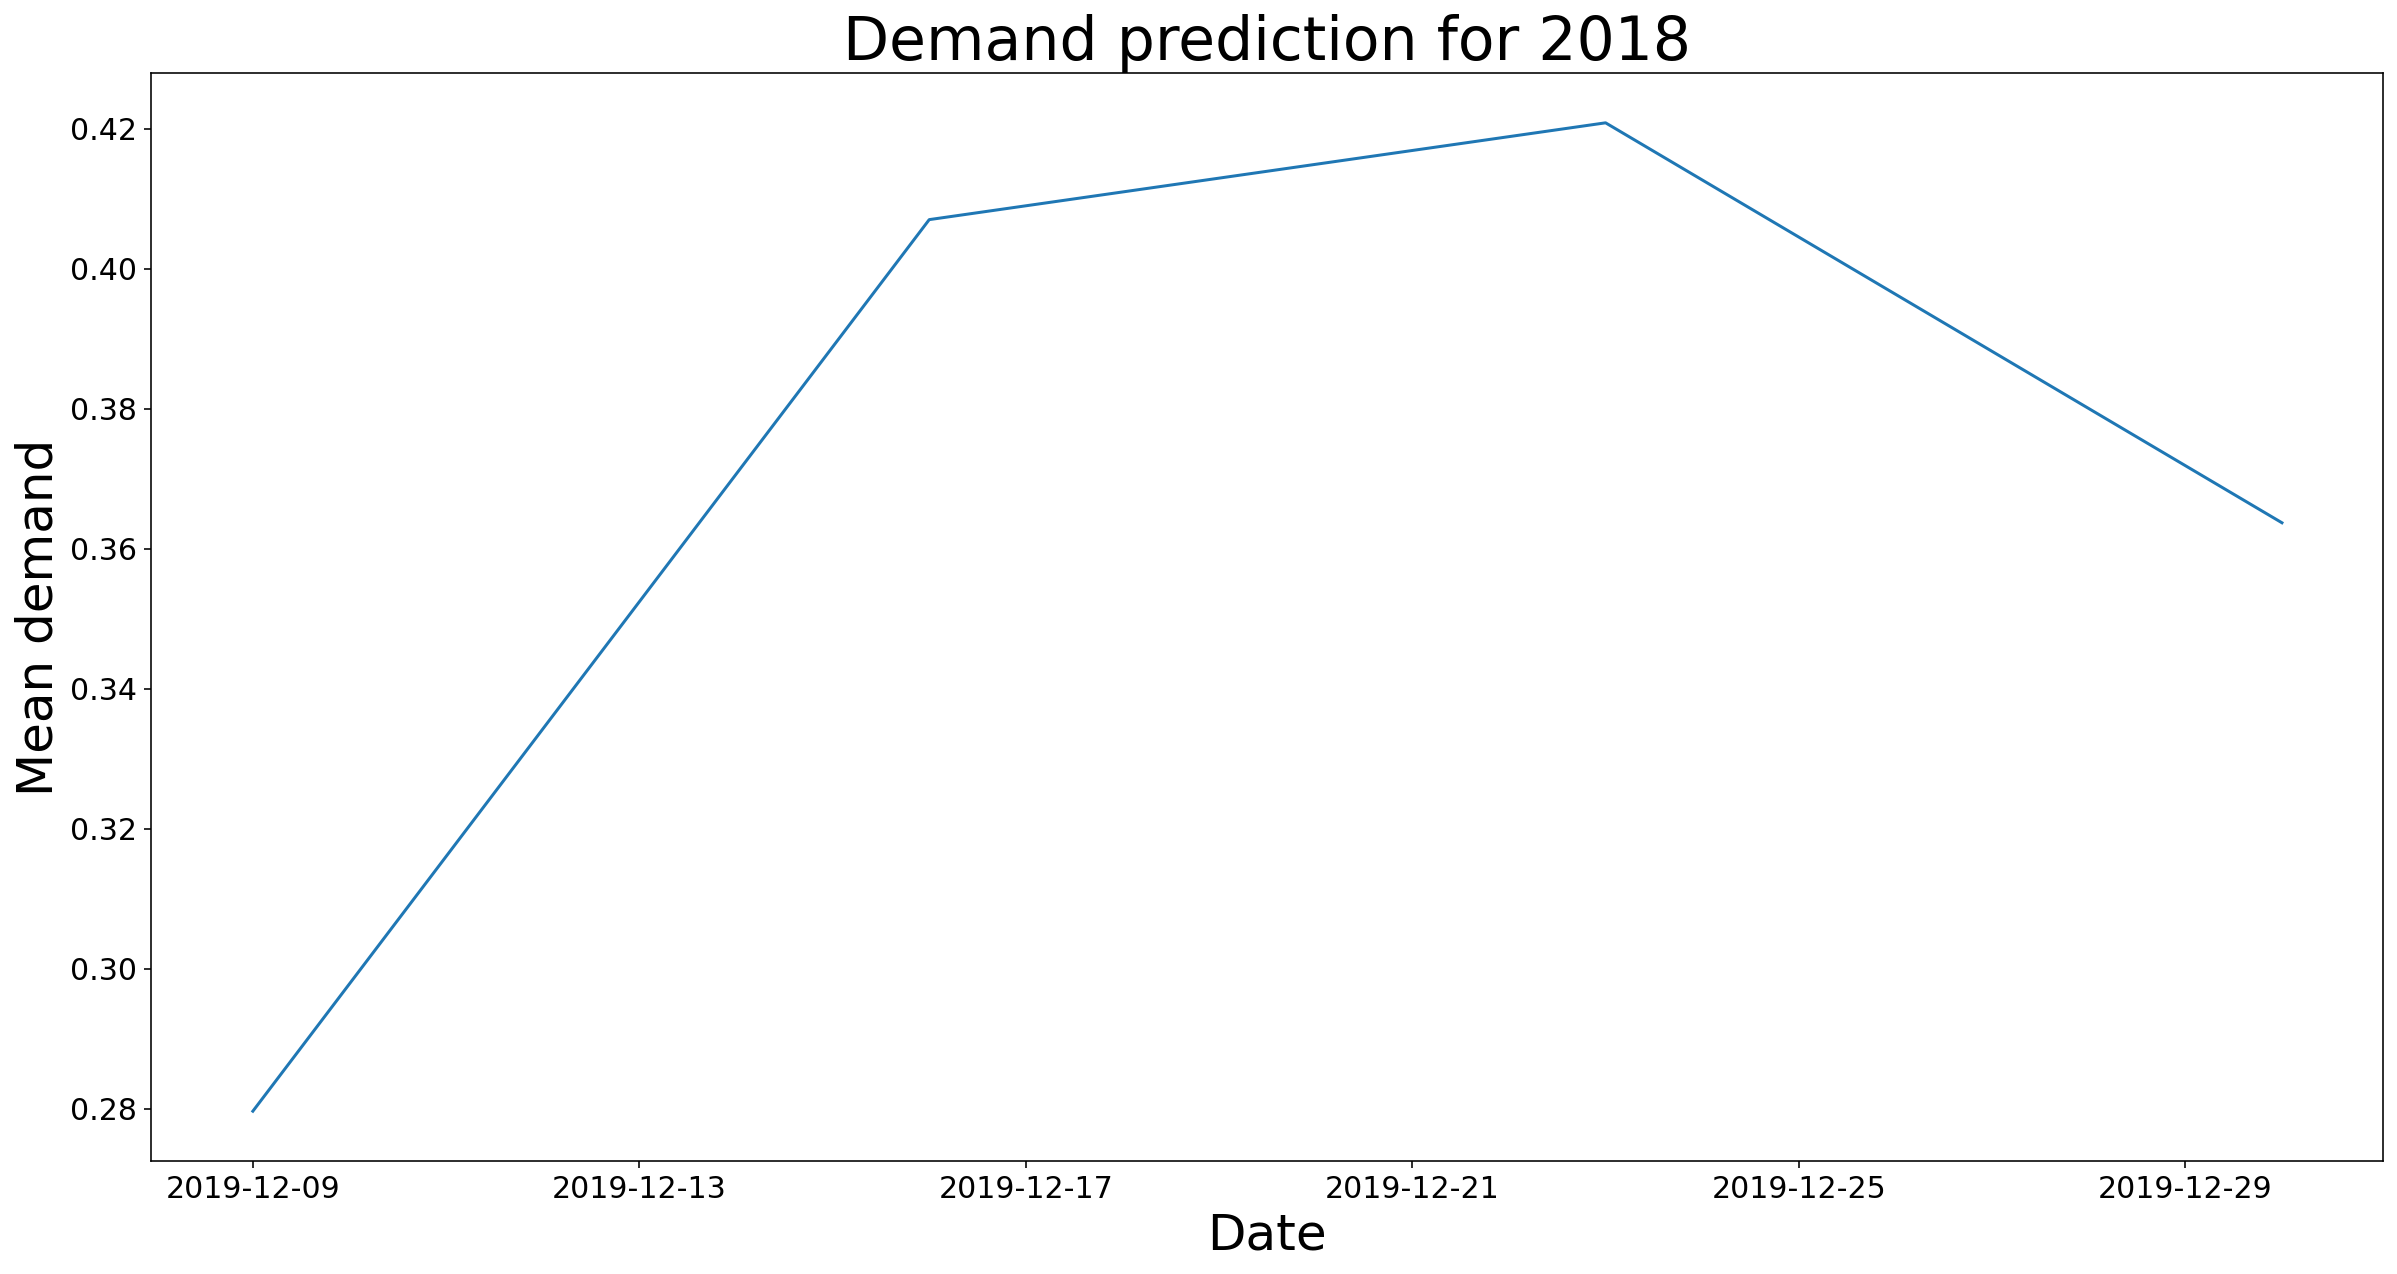

In [23]:
demand_prediction_2018 = test_.groupby(['period_dt'])['demand_2018'].mean().reset_index()
sns.lineplot(data=demand_prediction_2018, x='period_dt', y='demand_2018')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Demand prediction for 2018", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [24]:
test_['nearest_shops_demand_2017'] = np.nan
test_['nearest_products_demand_2017'] = np.nan

In [25]:
train_december_2017 = train_[(train_['period_dt'] >= (dt.date(2017, 12, 1))) & (train_['period_dt'] <= (dt.date(2017, 12, 31)))]

In [26]:
for iter, row in test_.iterrows():
    closest_data = min(list(train_december_2017['period_dt'].unique()), key=lambda x: abs(x - row['period_dt']))
    product_locations_2017 = train_december_2017[(train_december_2017['product_id'] == row['product_id']) & 
                                                 (train_december_2017['period_dt'] == closest_data)]
    
    if not product_locations_2017[product_locations_2017['location_zone_1'] == row['location_zone_1']].empty:
        product_locations_2017 = product_locations_2017[product_locations_2017['location_zone_1'] == row['location_zone_1']]
    test_.loc[iter, 'nearest_shops_demand_2017'] = product_locations_2017['demand'].mean()

    location_products_2017 = train_december_2017[(train_december_2017['location_id'] == row['location_id']) & 
                                                 (train_december_2017['period_dt'] == closest_data)]
    if not location_products_2017[location_products_2017['product_category_1'] == row['product_category_1']].empty:
        location_products_2017 = location_products_2017[location_products_2017['product_category_1'] == row['product_category_1']]
    test_.loc[iter, 'nearest_products_demand_2017'] = location_products_2017['demand'].mean()

In [27]:
print(test_['nearest_shops_demand_2017'].isnull().sum())
print(test_['nearest_products_demand_2017'].isnull().sum())

524
22


In [28]:
test_['nearest_products_demand_2017'] = test_['nearest_products_demand_2017'].fillna(1)
test_['nearest_shops_demand_2017'] = np.where(test_['nearest_shops_demand_2017'].isnull(), test_['nearest_products_demand_2017'], test_['nearest_shops_demand_2017'])
test_['demand_2017'] = 0.5 * test_['nearest_shops_demand_2017'] + 0.5 * test_['nearest_products_demand_2017']

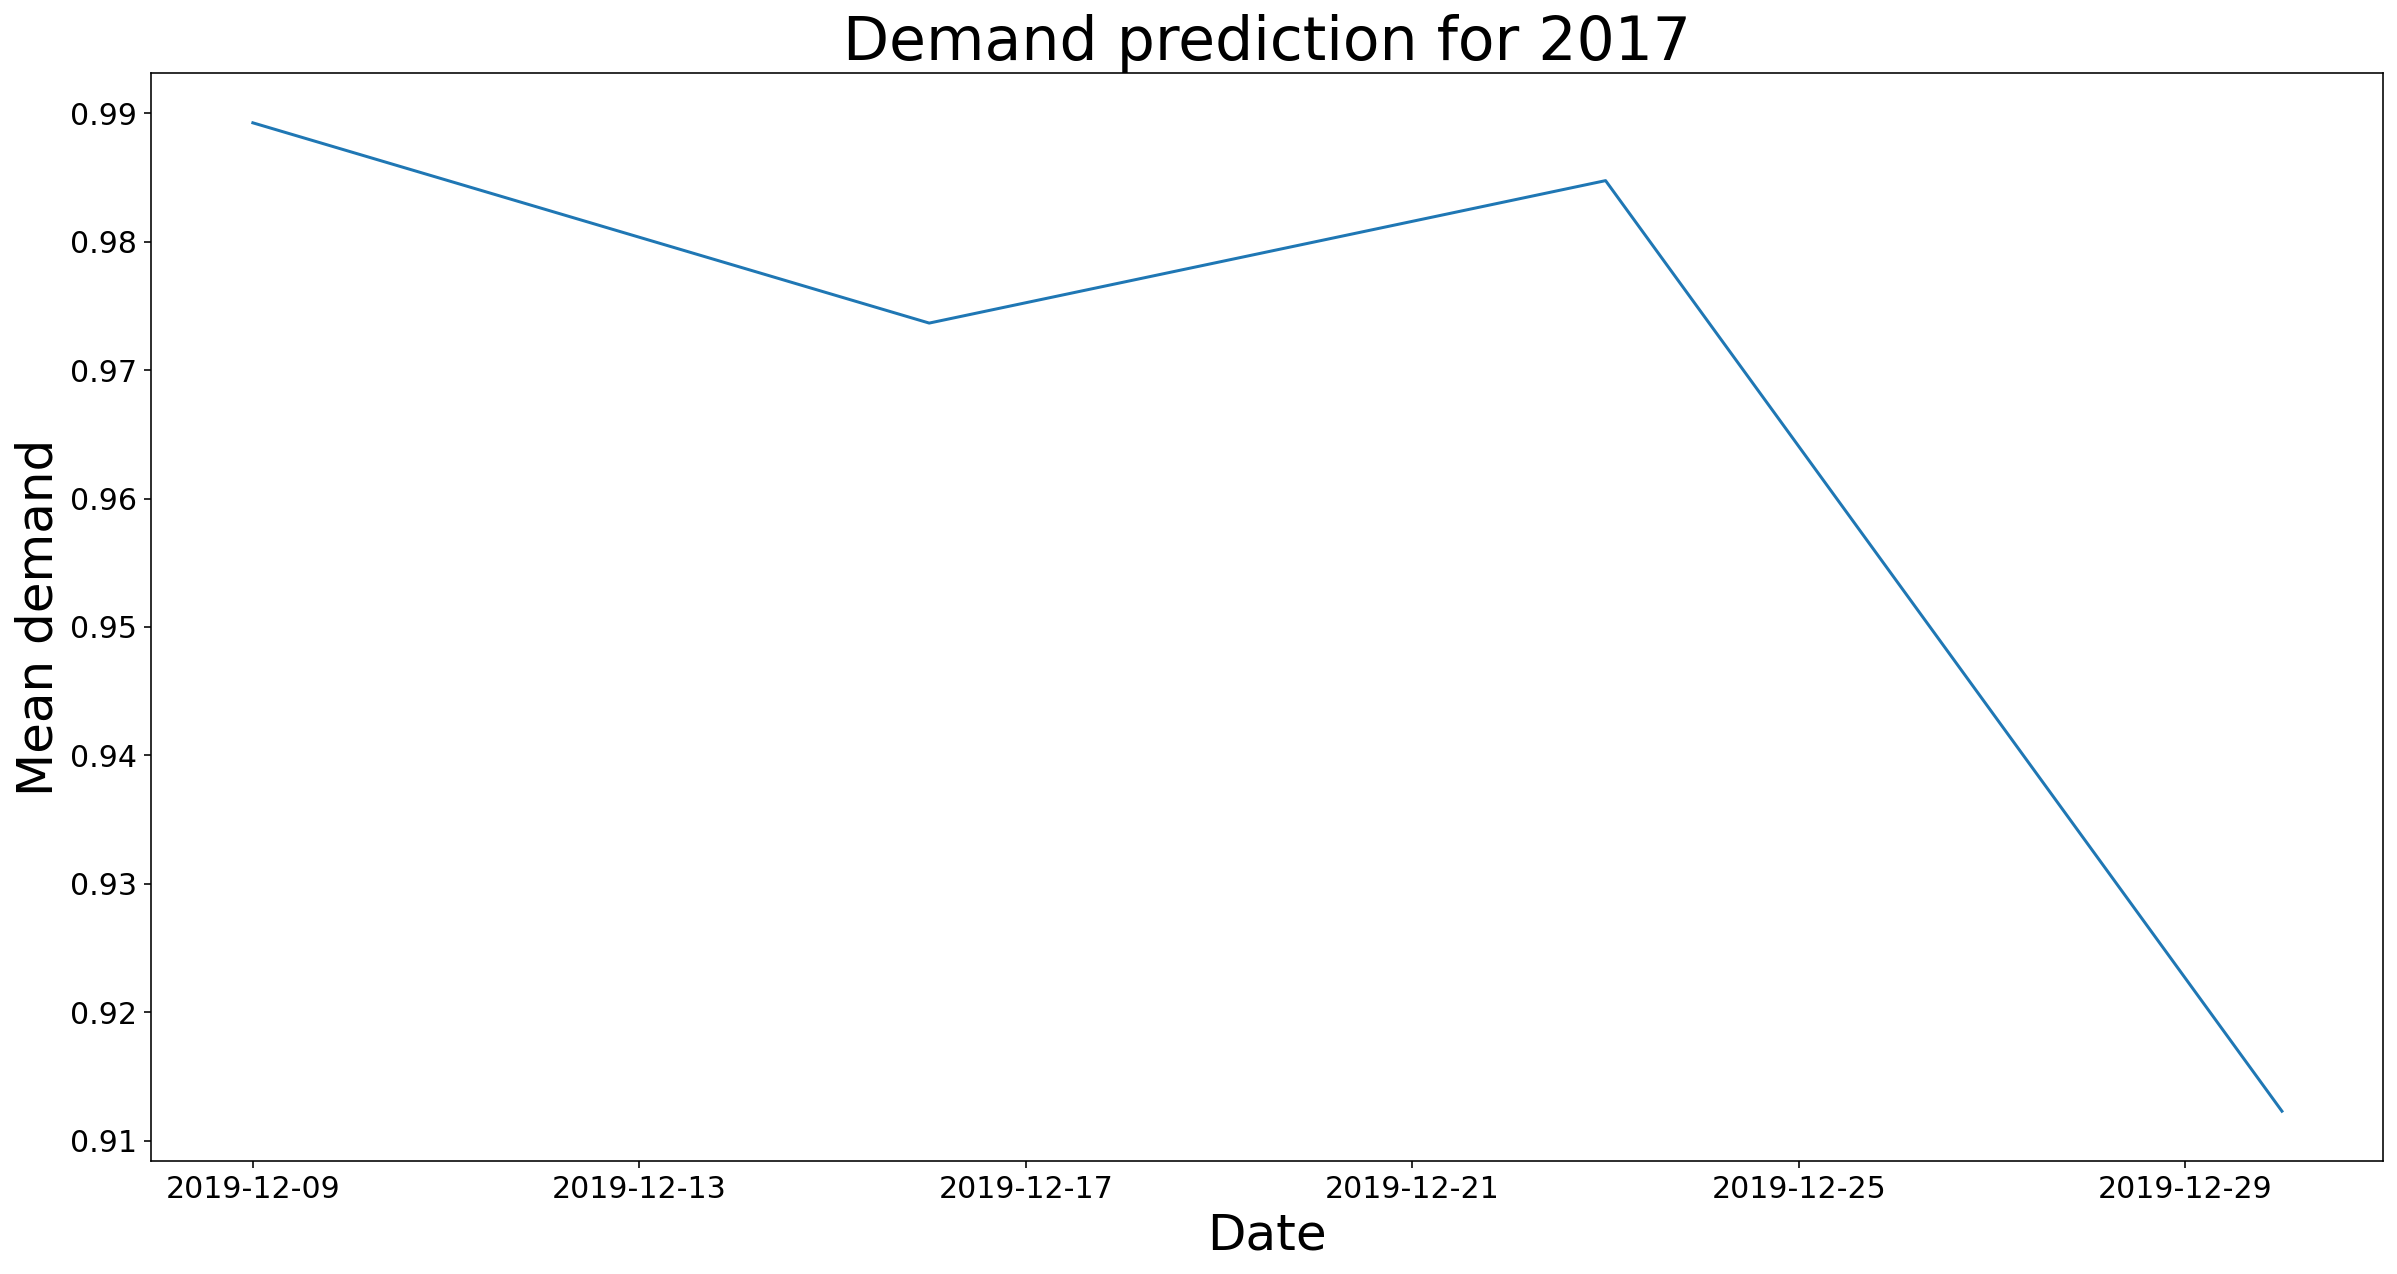

In [29]:
demand_prediction_2017 = test_.groupby(['period_dt'])['demand_2017'].mean().reset_index()
sns.lineplot(data=demand_prediction_2017, x='period_dt', y='demand_2017')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Demand prediction for 2017", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Compute the final predictions. ###

In [30]:
test_['demand'] = 1/3 * test_['demand_3_weeks'] + 1/3 * test_['demand_2018'] + 1/3 * test_['demand_2017']

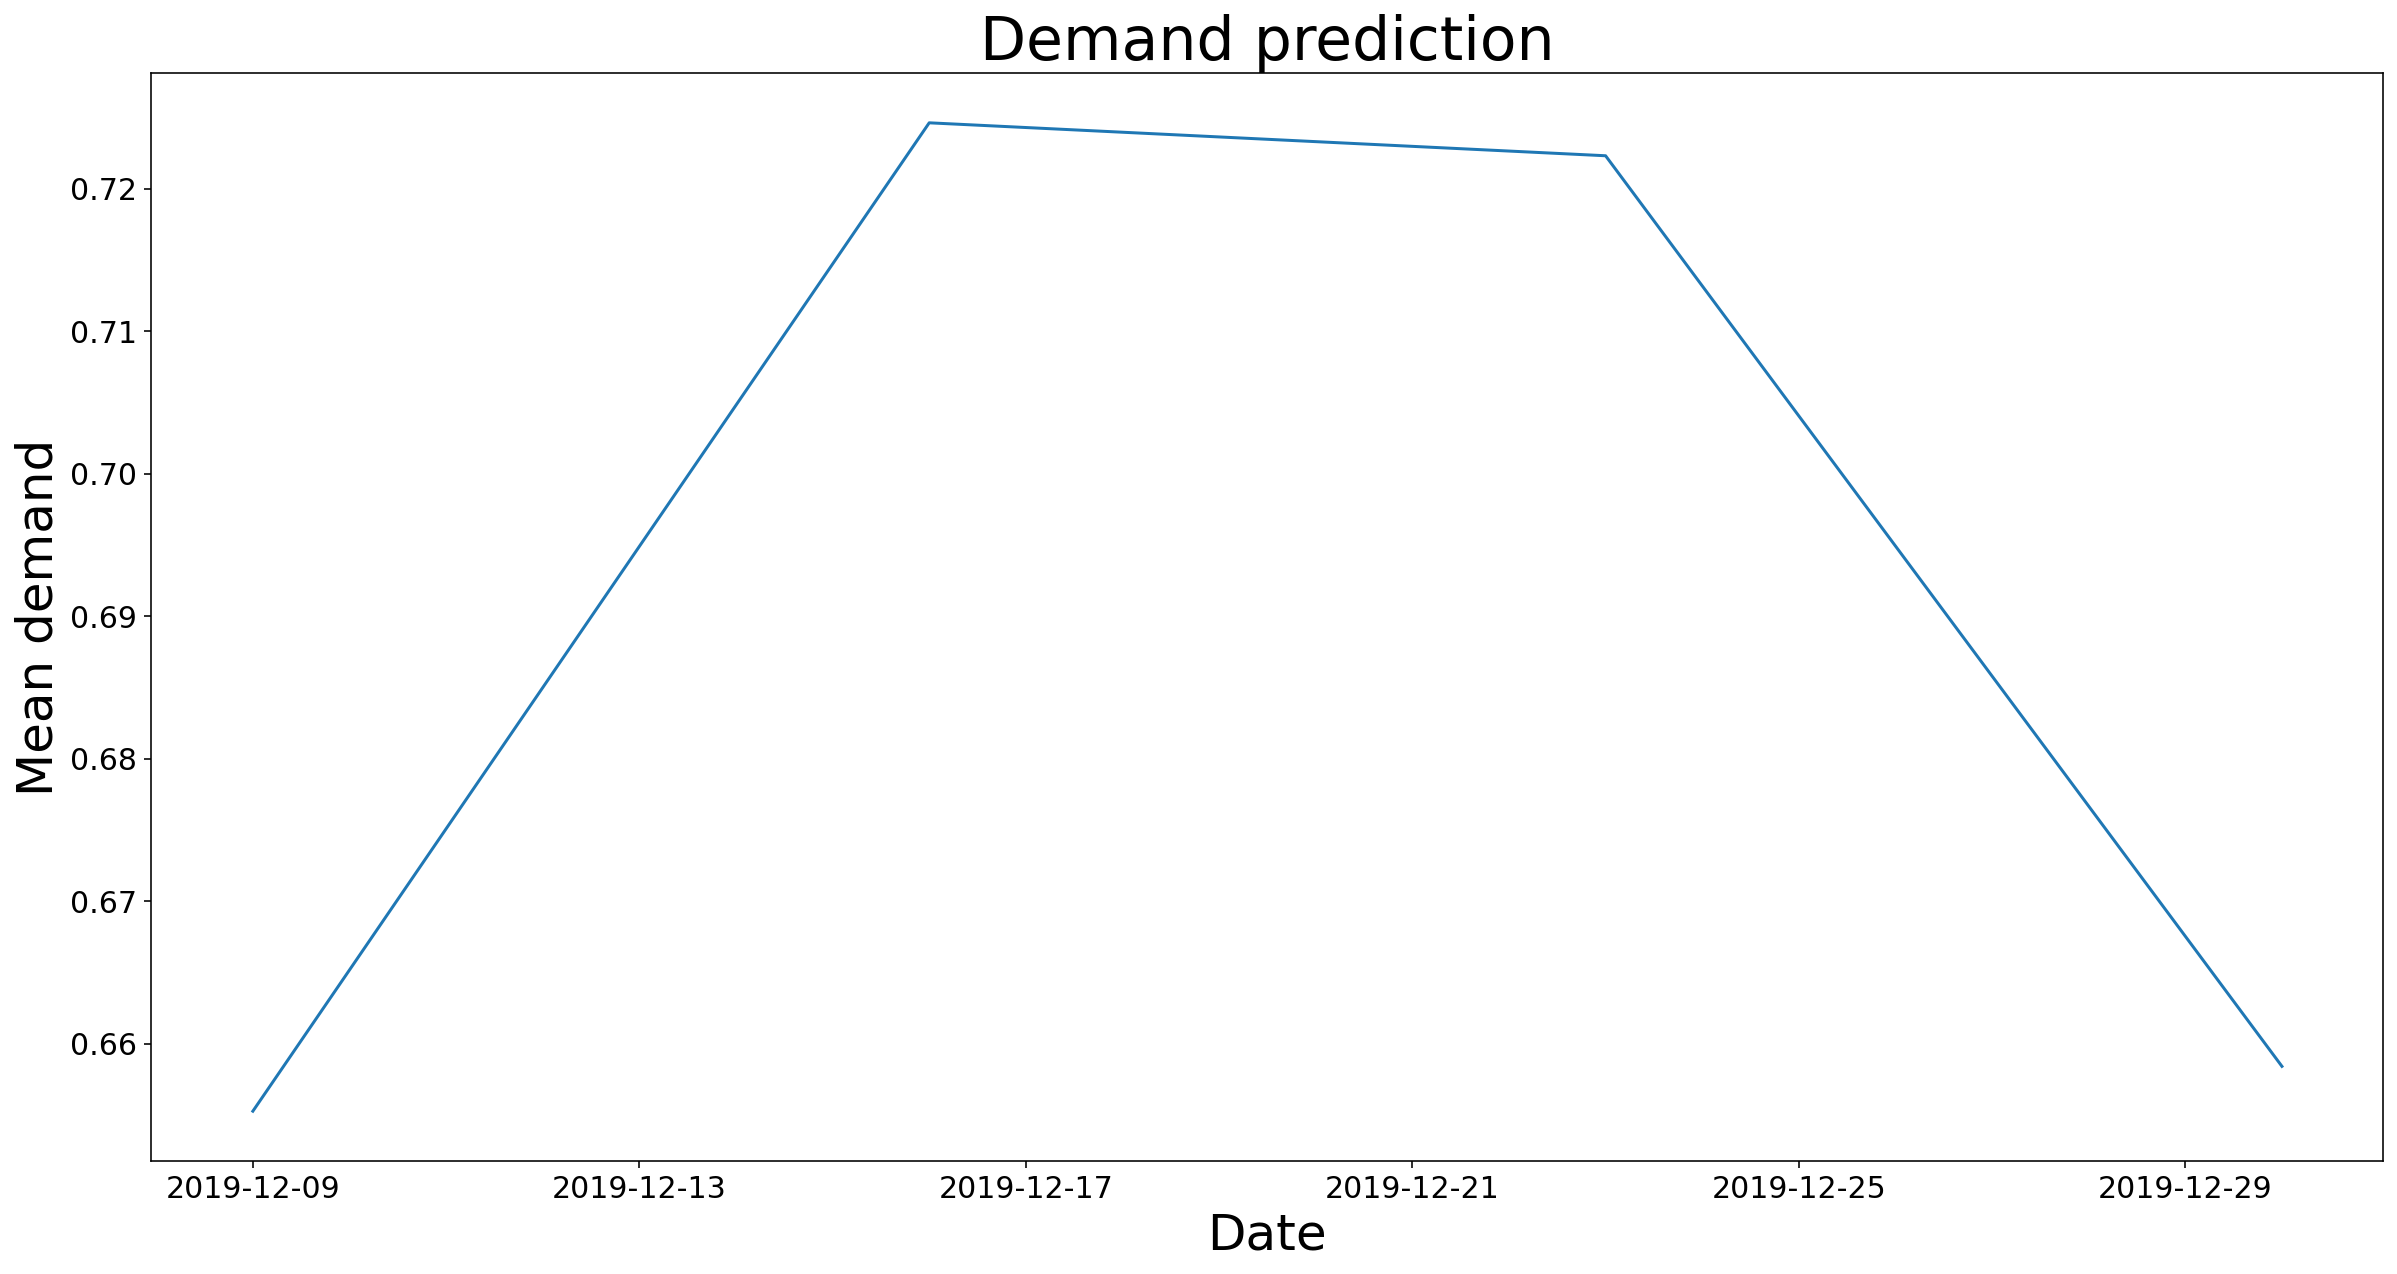

In [31]:
demand_prediction_ = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [32]:
test_['demand'] = test_['demand'].apply(lambda x: 0 if x < 0.25 else x)
test_['demand'] = test_['demand'].apply(lambda x: 1 if x >= 0.25 and x <= 1.75 else x)

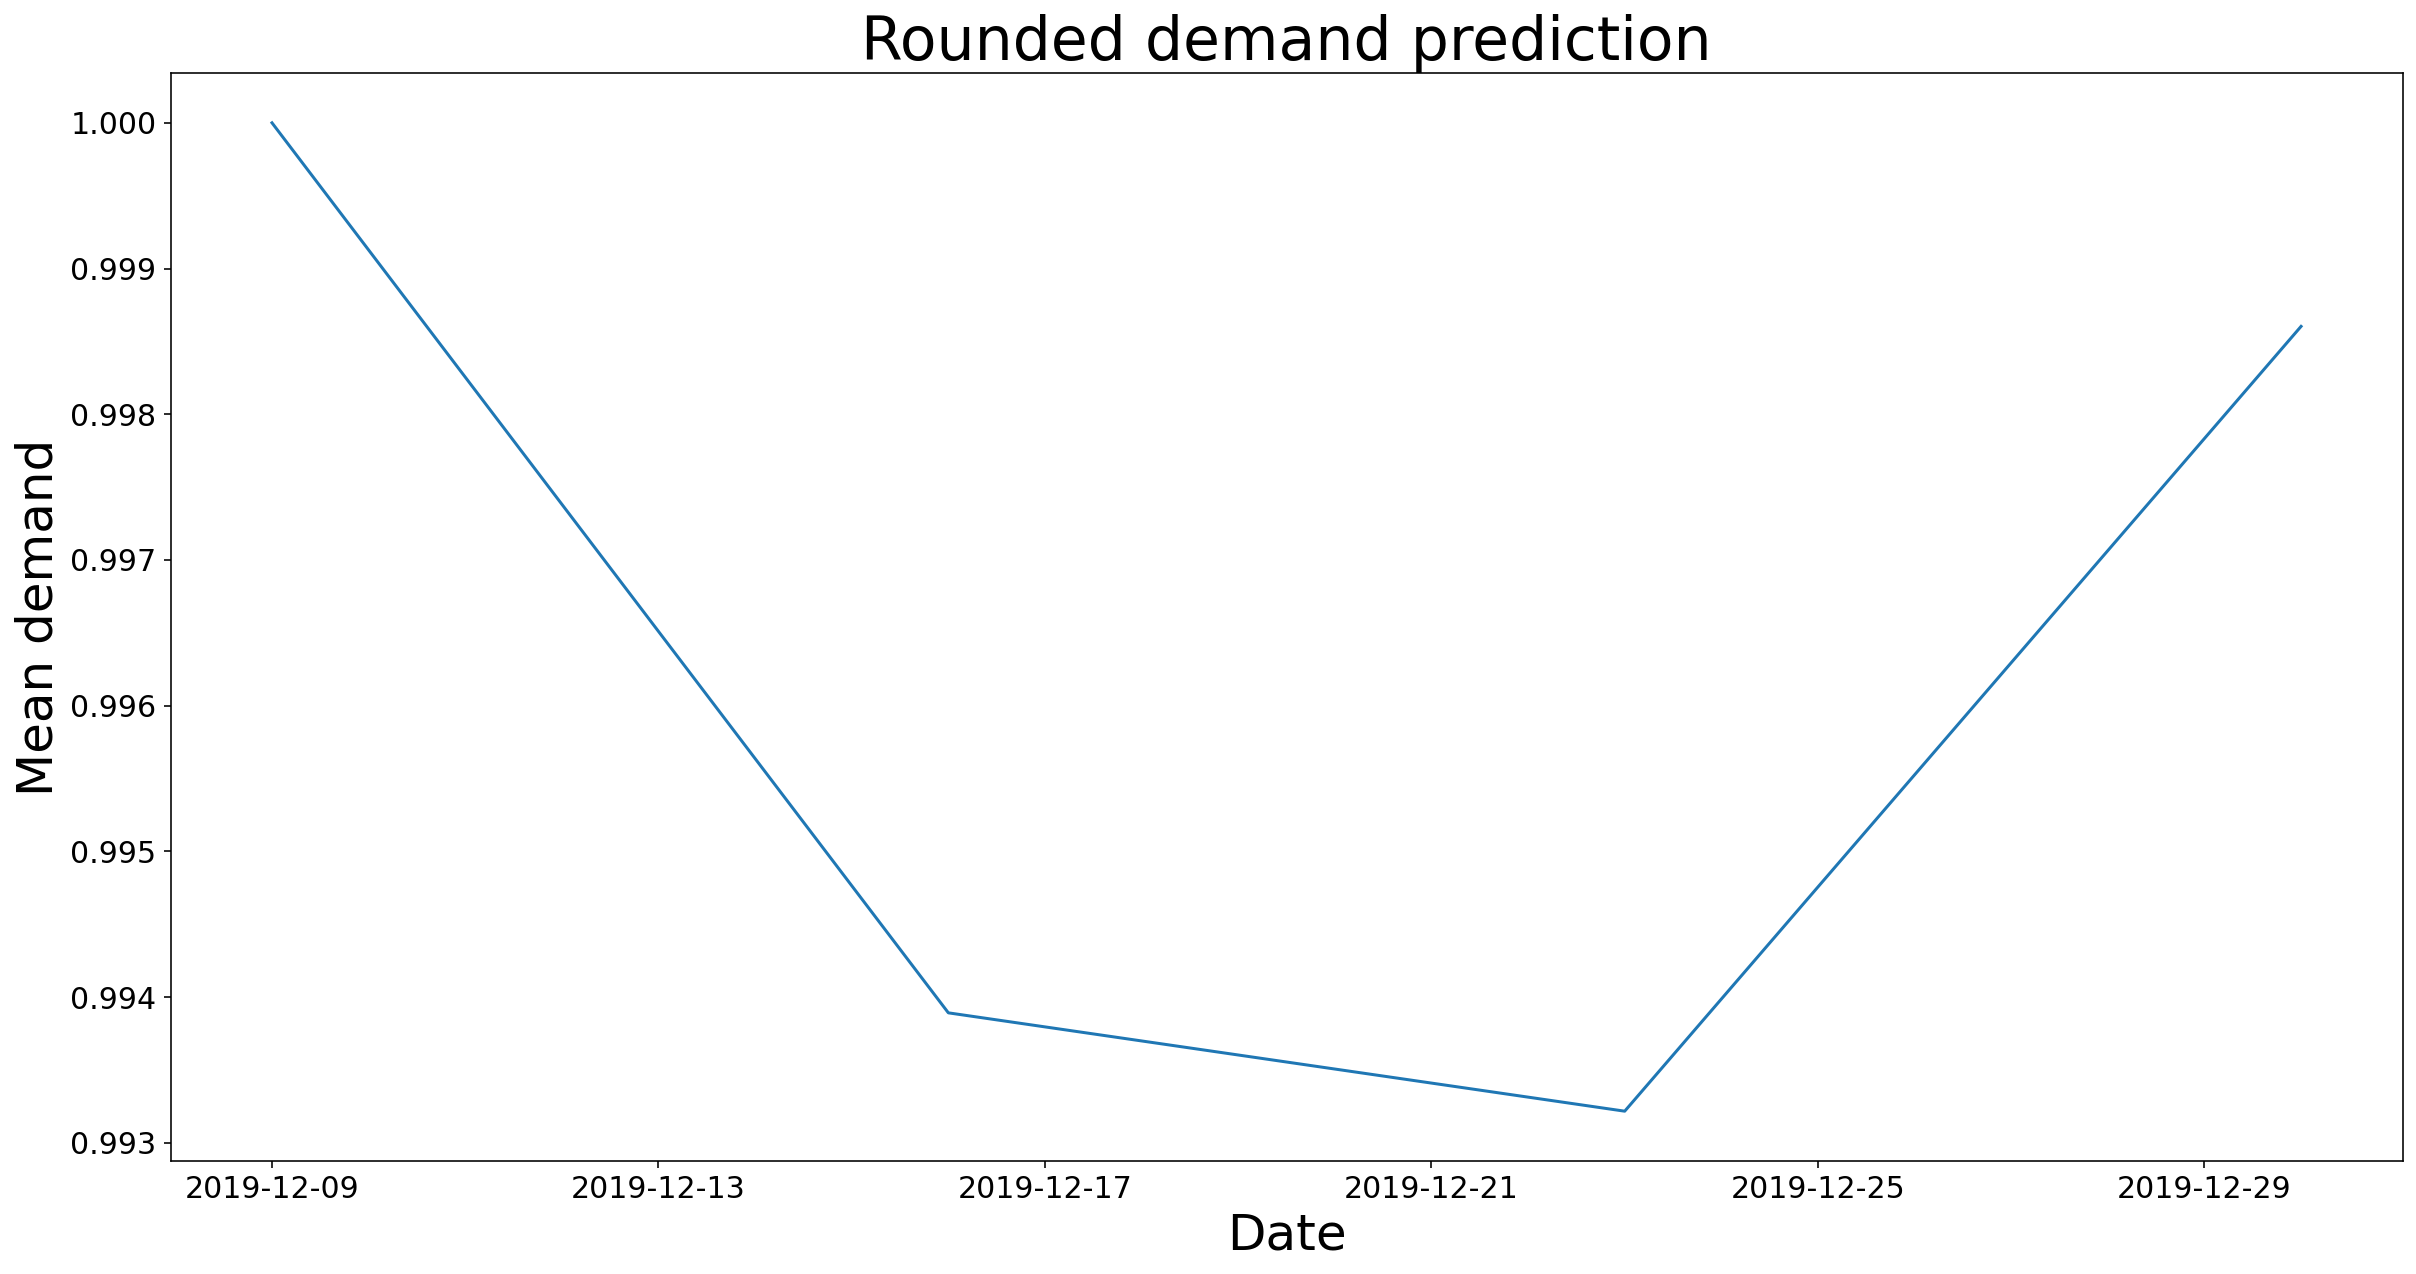

In [33]:
demand_prediction_rounded = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_rounded, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Rounded demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [34]:
test_['demand'] = np.where((test_['period_dt'] == dt.date(2019, 12, 16)) | (test_['period_dt'] == dt.date(2019, 12, 23)), np.maximum(1, test_['demand']), test_['demand'])

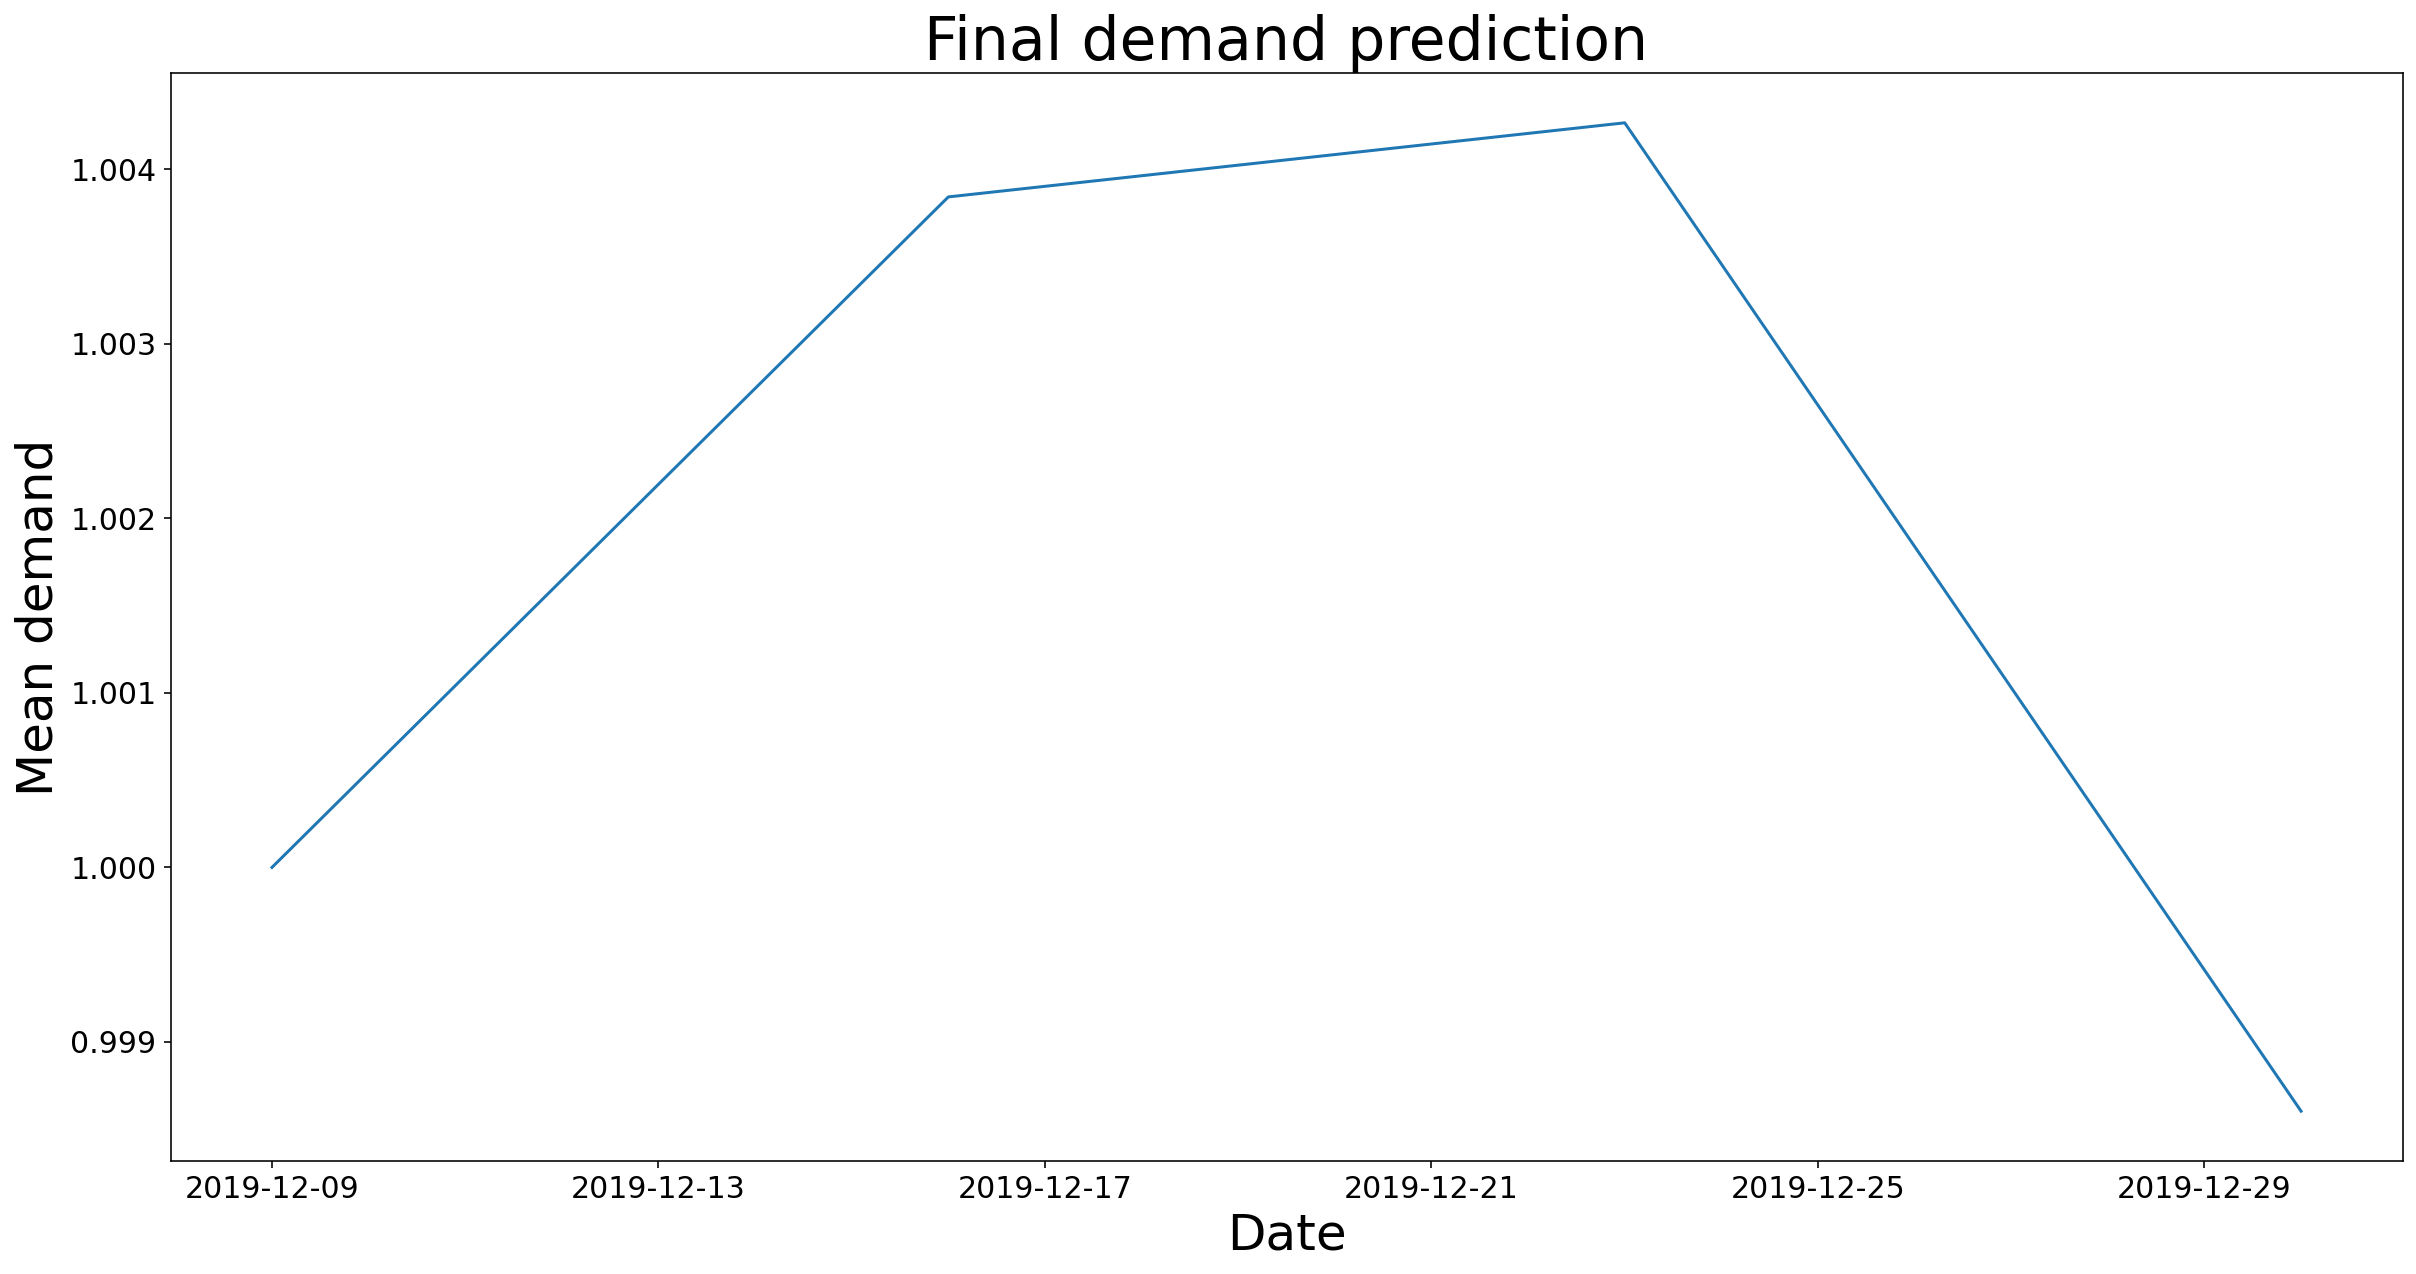

In [35]:
demand_prediction_final = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_final, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Final demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [36]:
answer_df = test_[['id', 'demand']]
answer_df.to_csv('out.csv', index=False)

### Unfortunately, we cant beat benchmark without ML, probably we should try ARIMA. ###

In [37]:
%pip install pmdarima
%pip install chart-studio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [38]:
from sklearn.model_selection import train_test_split
period = 4
data_grouped_demand = train.groupby(['period_dt'])['demand'].mean().reset_index()
train_ARIMA, test_ARIMA = train_test_split(data_grouped_demand['demand'].to_list(), test_size=period, shuffle=False)

/Users/alexander/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


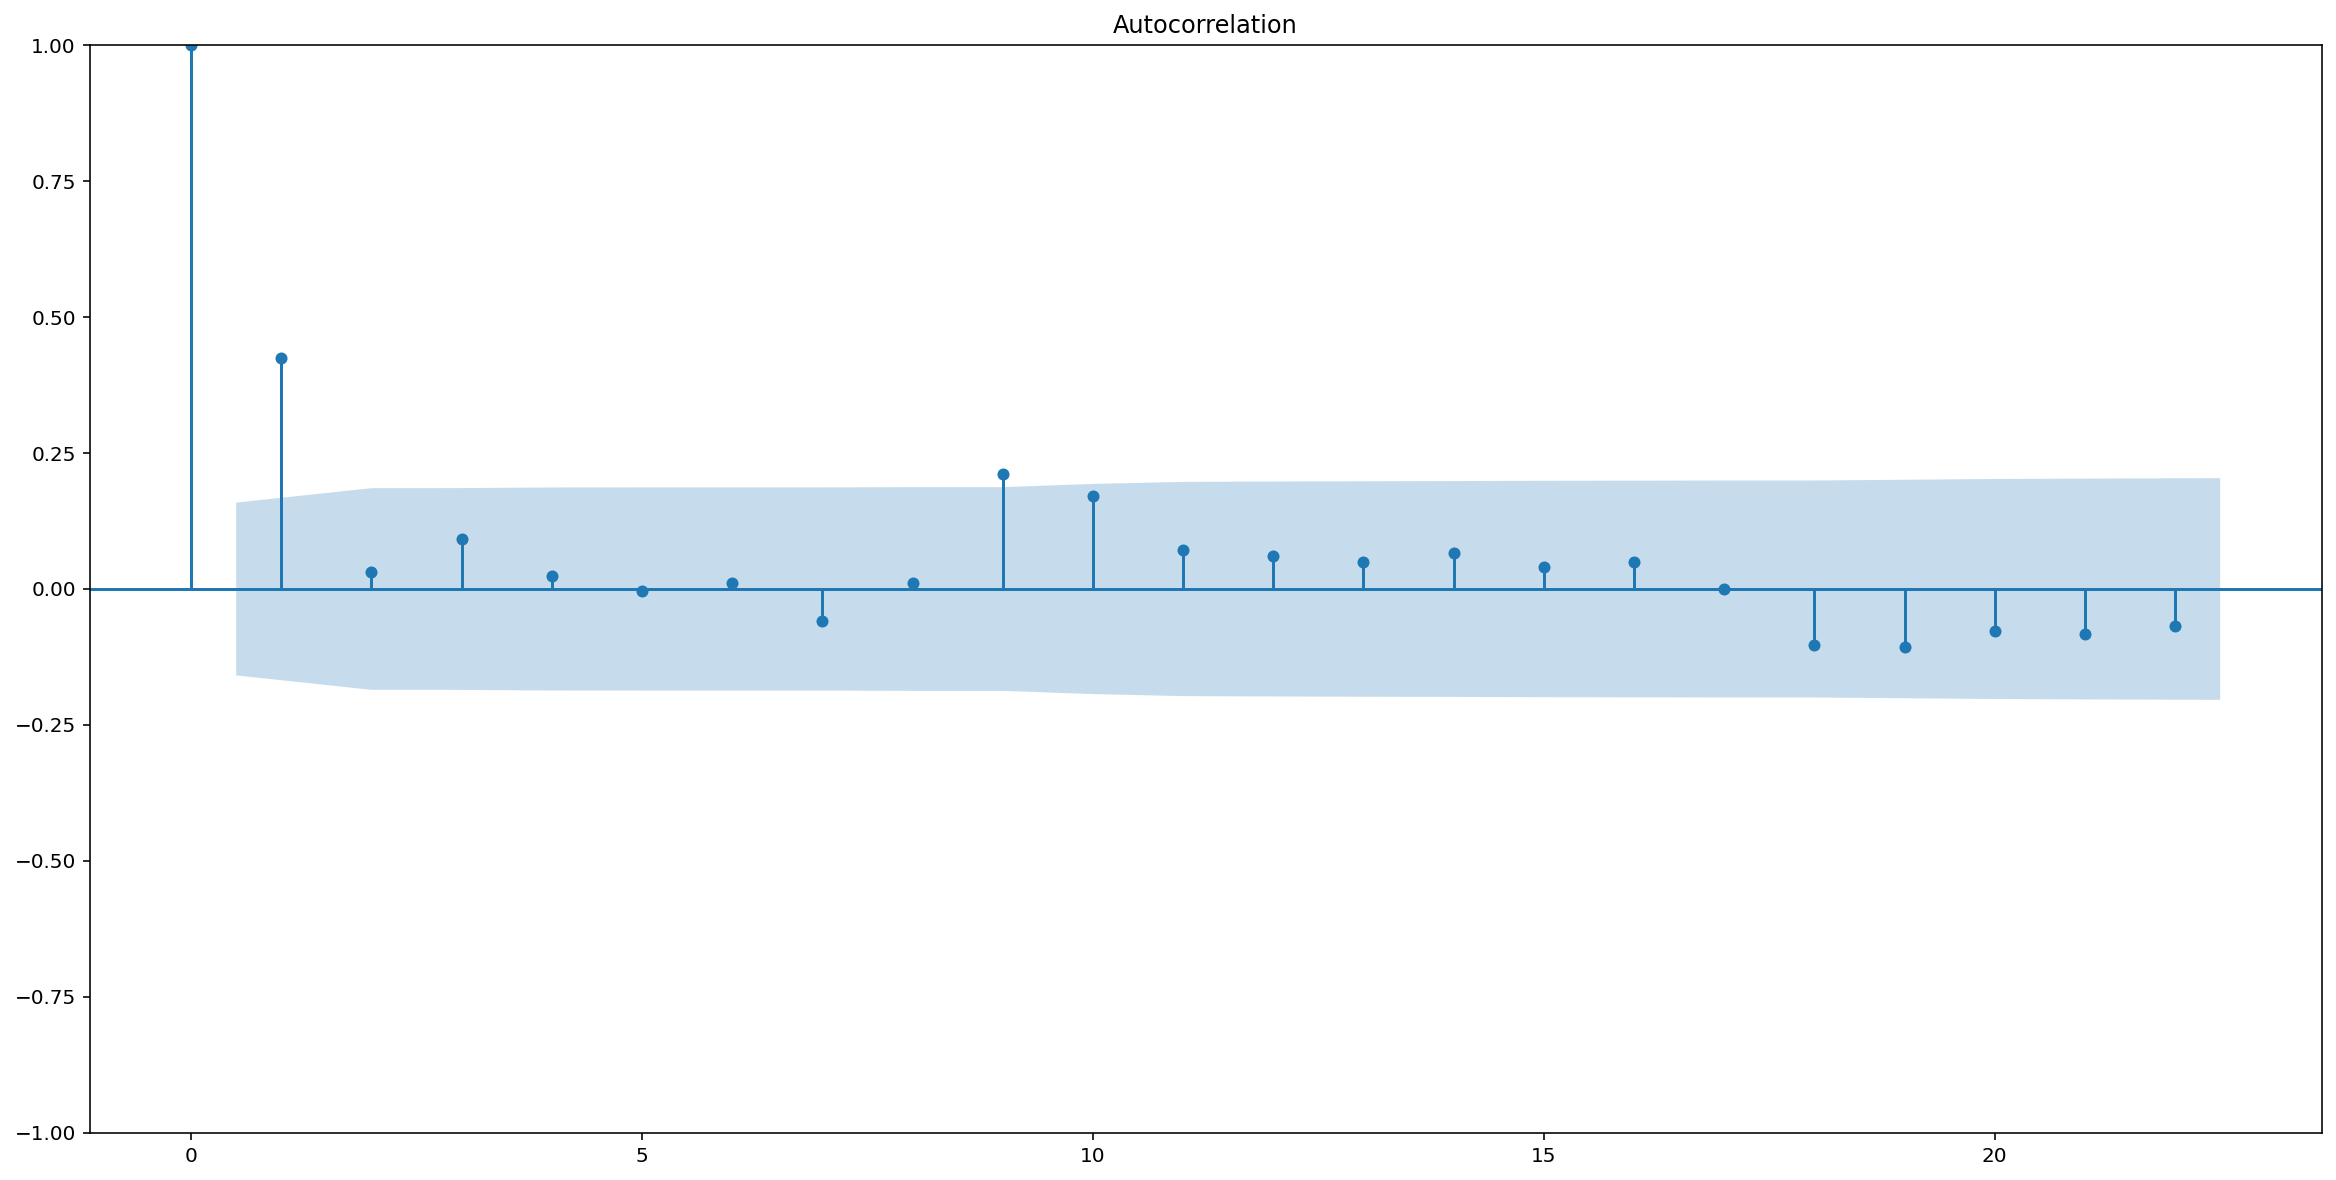

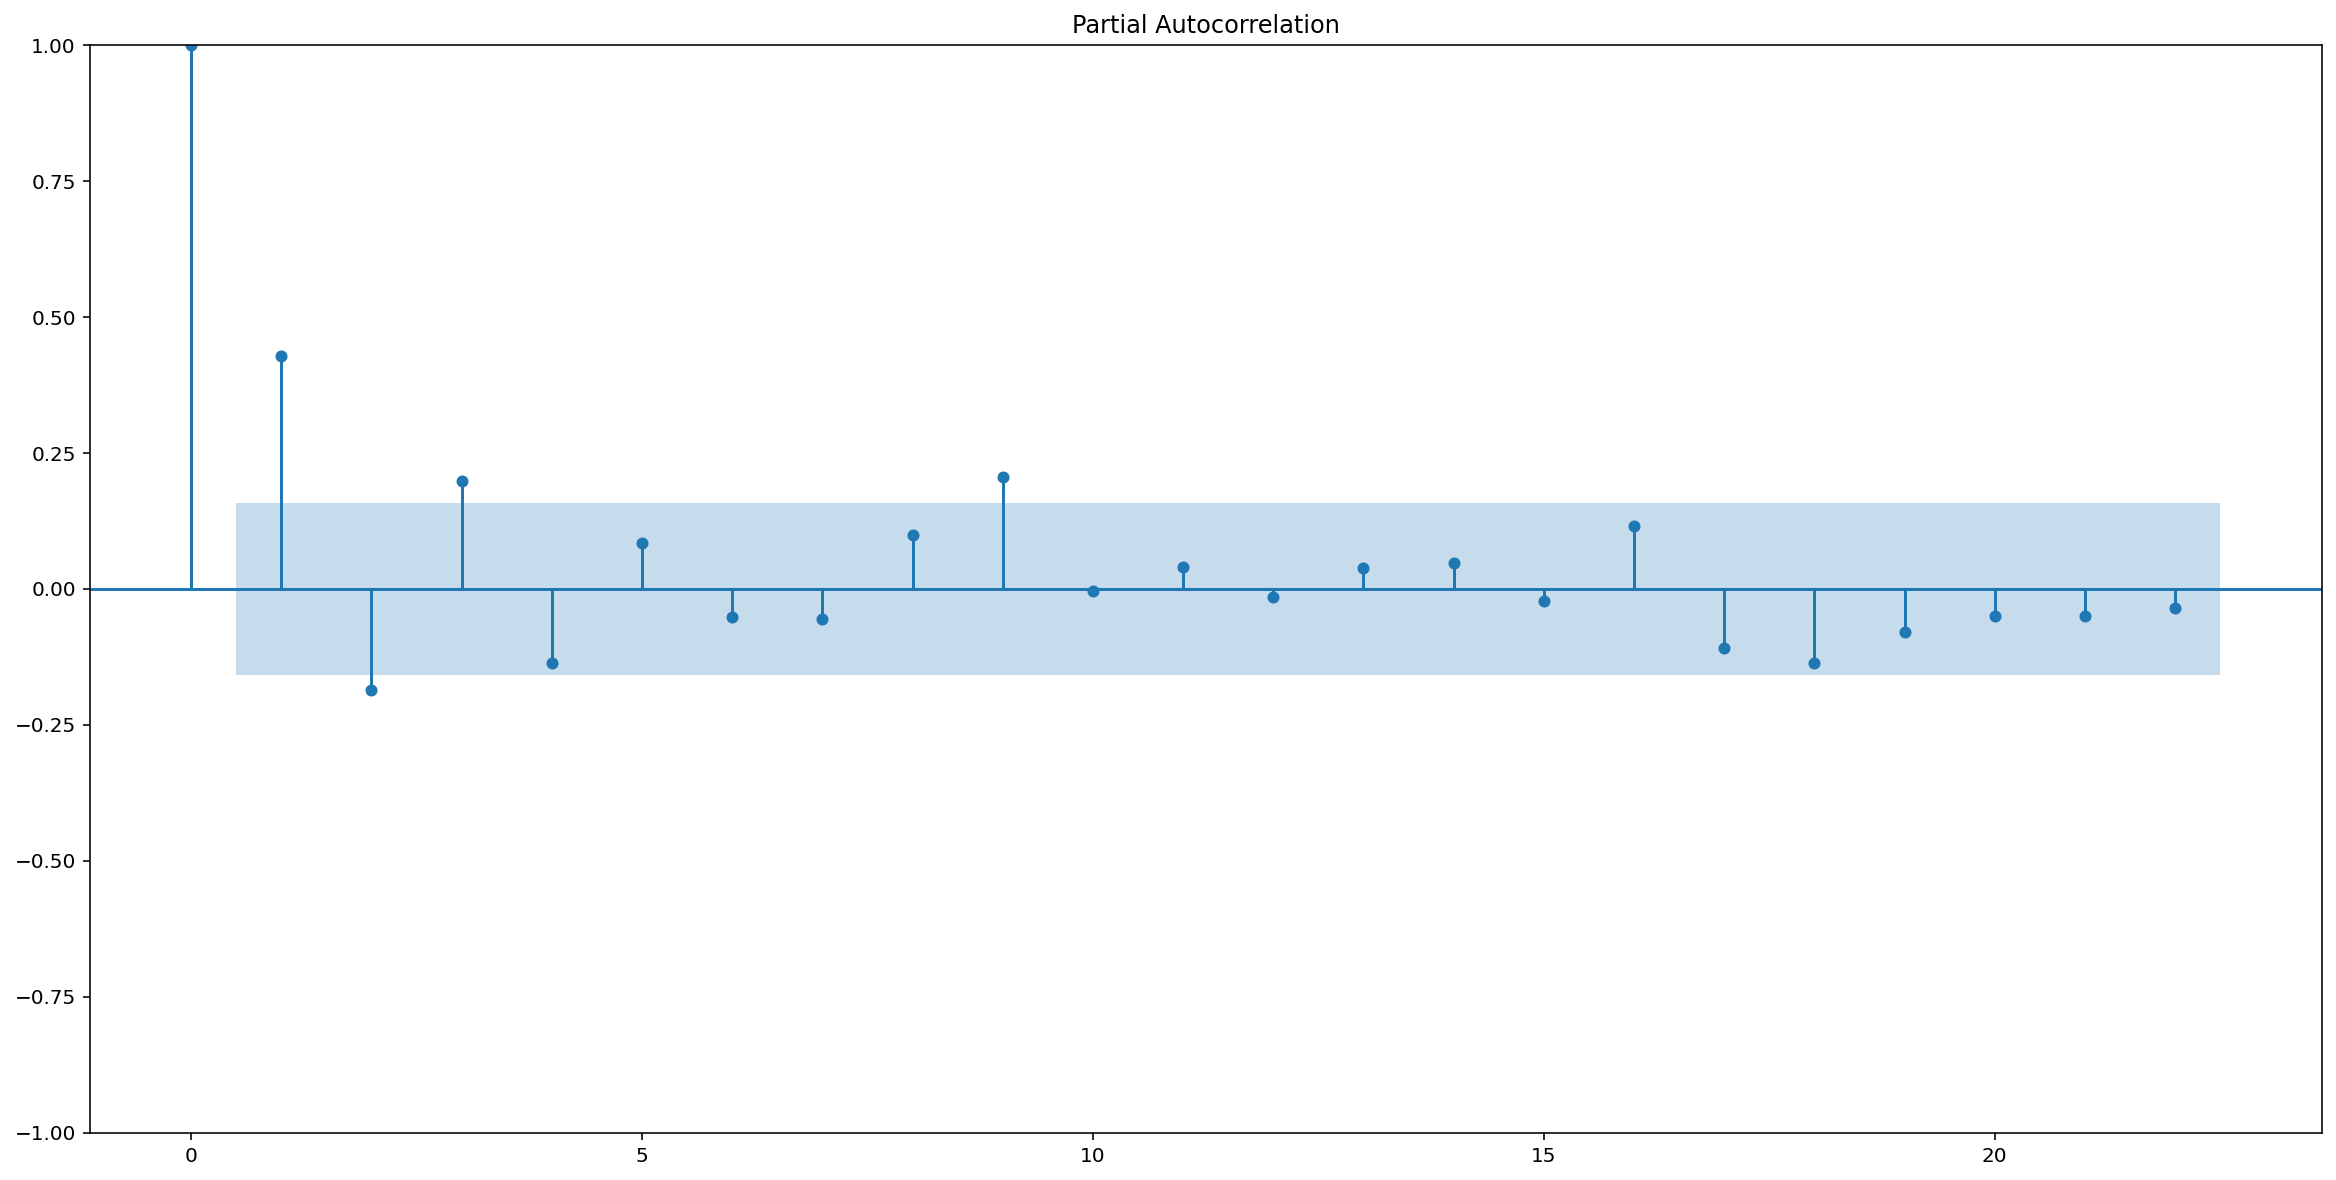

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(data_grouped_demand['demand'])
plot_pacf(data_grouped_demand['demand'])
plt.show()

In [40]:
from pmdarima.arima import auto_arima
model = auto_arima(train_ARIMA, test='adf', seasonal=True, m=52, scoring='mae')

In [41]:
model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (1, 0, 2),
 'out_of_sample_size': 0,
 'scoring': 'mae',
 'scoring_args': {},
 'seasonal_order': (1, 0, 0, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [42]:
from sklearn.metrics import mean_absolute_error
test_pred = model.predict(period)
test_MAE = mean_absolute_error(test_ARIMA, test_pred)

print("Test MAE = %.3f" % test_MAE)

Test MAE = 0.272


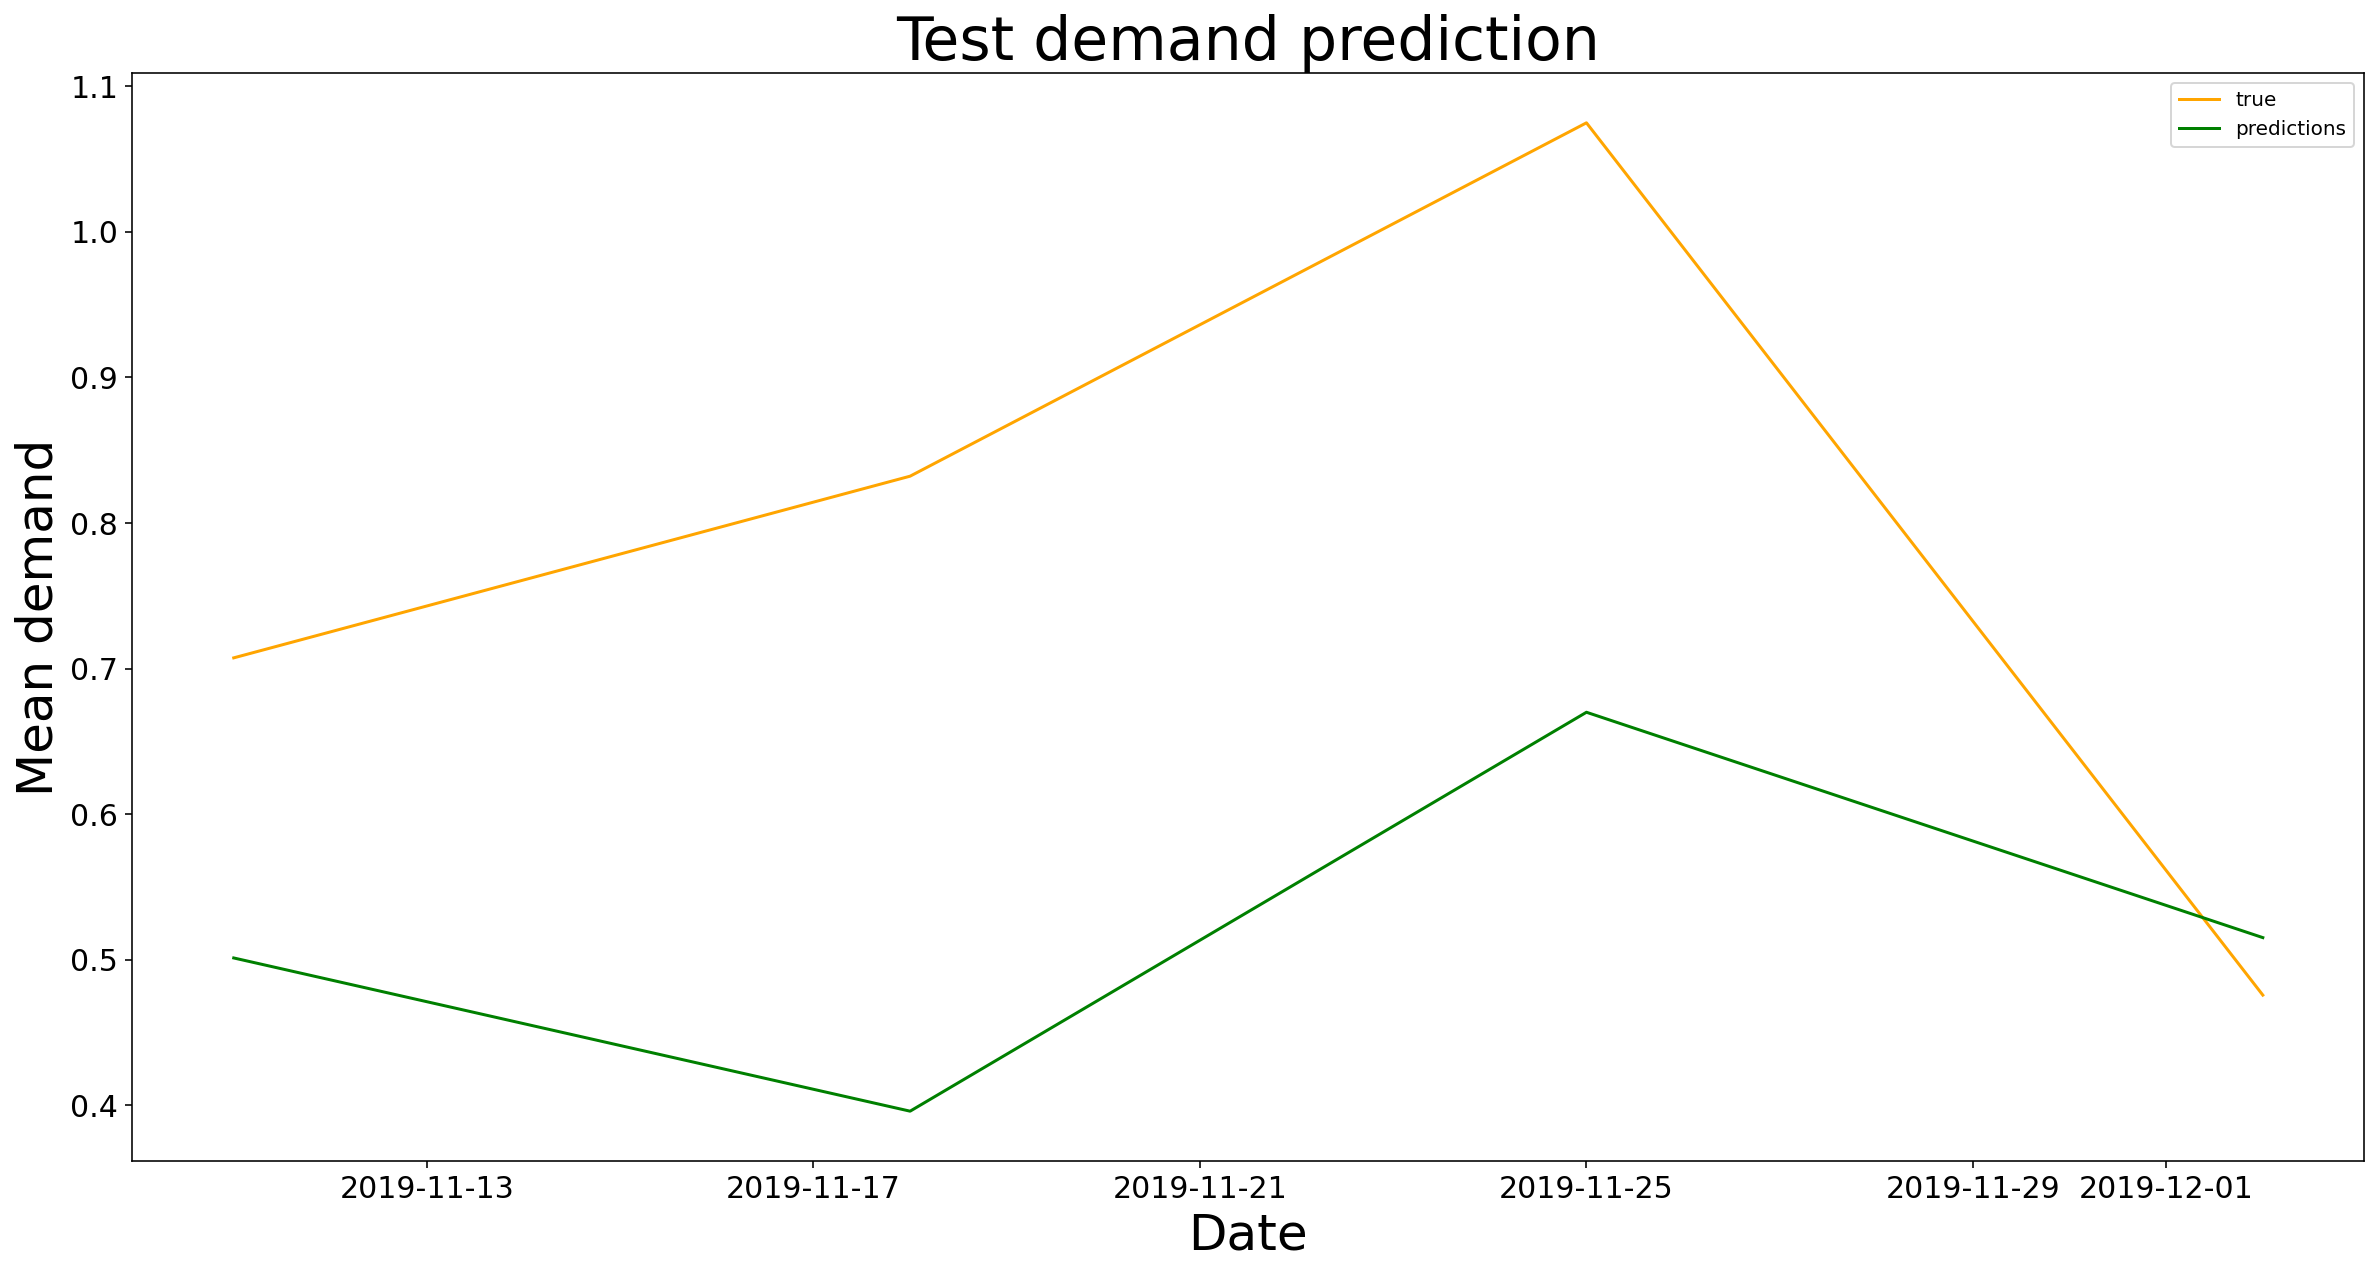

In [43]:
test_dates = data_grouped_demand['period_dt'][-period:]
plt.plot(test_dates, test_ARIMA, color = 'orange', label = 'true')
plt.plot(test_dates, test_pred, color = 'green', label = 'predictions')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Test demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend()
plt.show()

In [44]:
best_model = auto_arima(data_grouped_demand['demand'].to_list(), test='adf', seasonal=True, m=52, scoring='mae')
future_pred = best_model.predict(period)

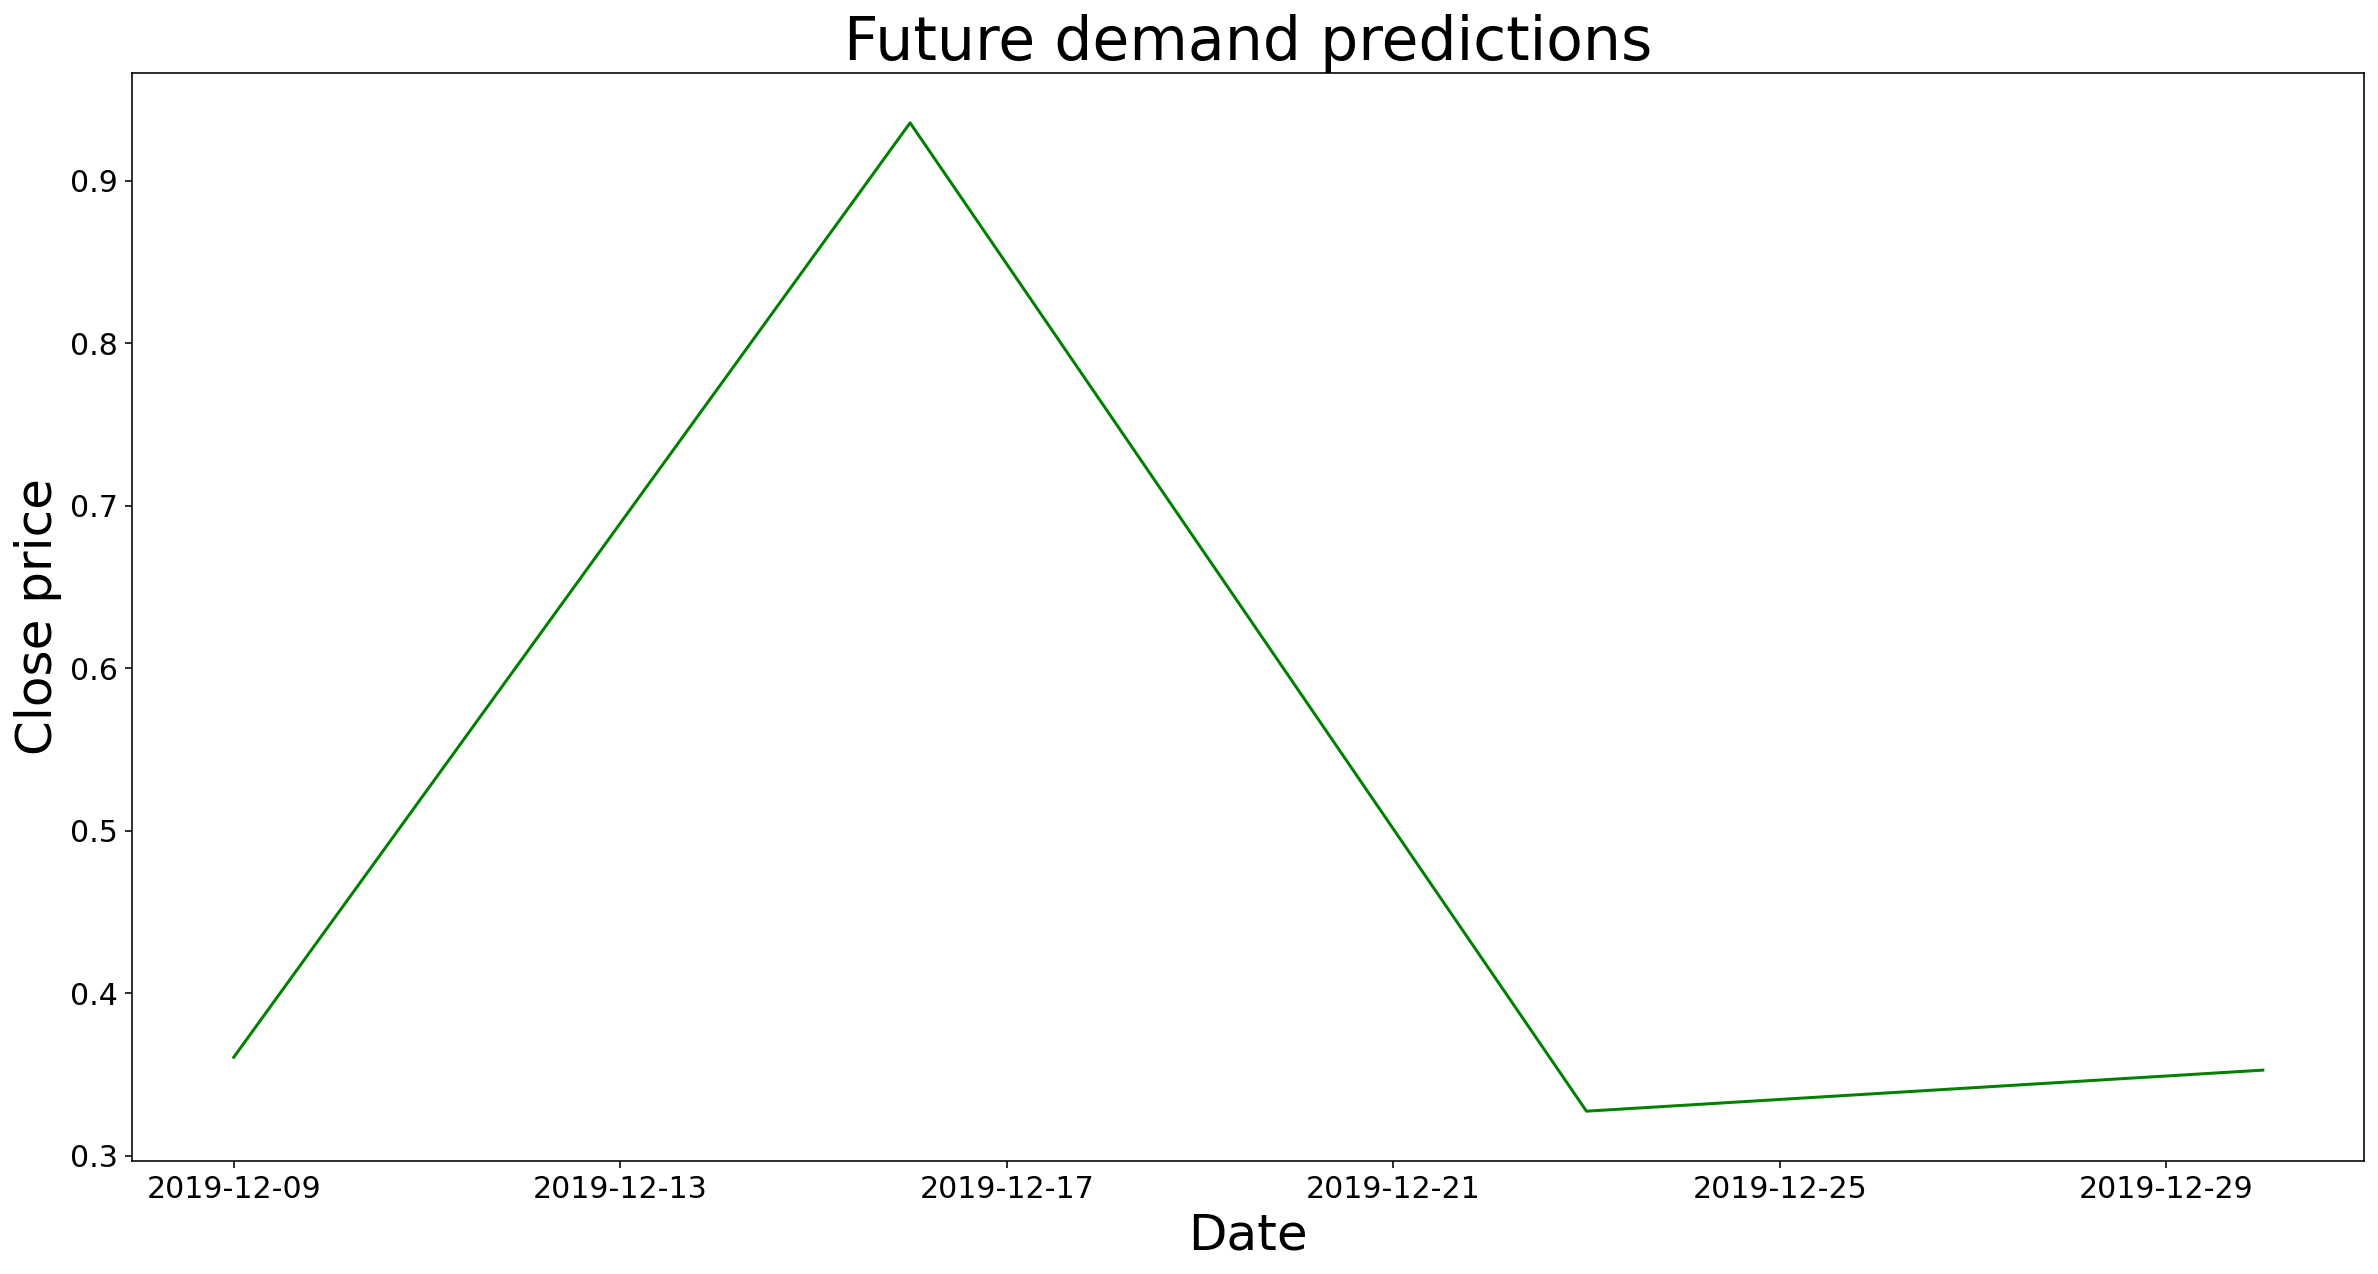

In [45]:
future_dates = sorted(test_['period_dt'].unique())
plt.title("Future demand predictions", fontsize = 30)
plt.plot(future_dates, future_pred, color = 'green')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Close price", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [46]:
date_pred = dict(zip(future_dates, future_pred))
date_pred

{datetime.date(2019, 12, 9): 0.36056415150668464,
 datetime.date(2019, 12, 16): 0.9356360450259943,
 datetime.date(2019, 12, 23): 0.3273748185181028,
 datetime.date(2019, 12, 30): 0.35263646417819083}

In [47]:
test_['demand_ARIMA'] = test_['period_dt'].apply(lambda x: date_pred[x])

In [48]:
test_['demand'] = 0.75 * test_['demand_3_weeks'] + 0.25 * test_['demand_ARIMA']

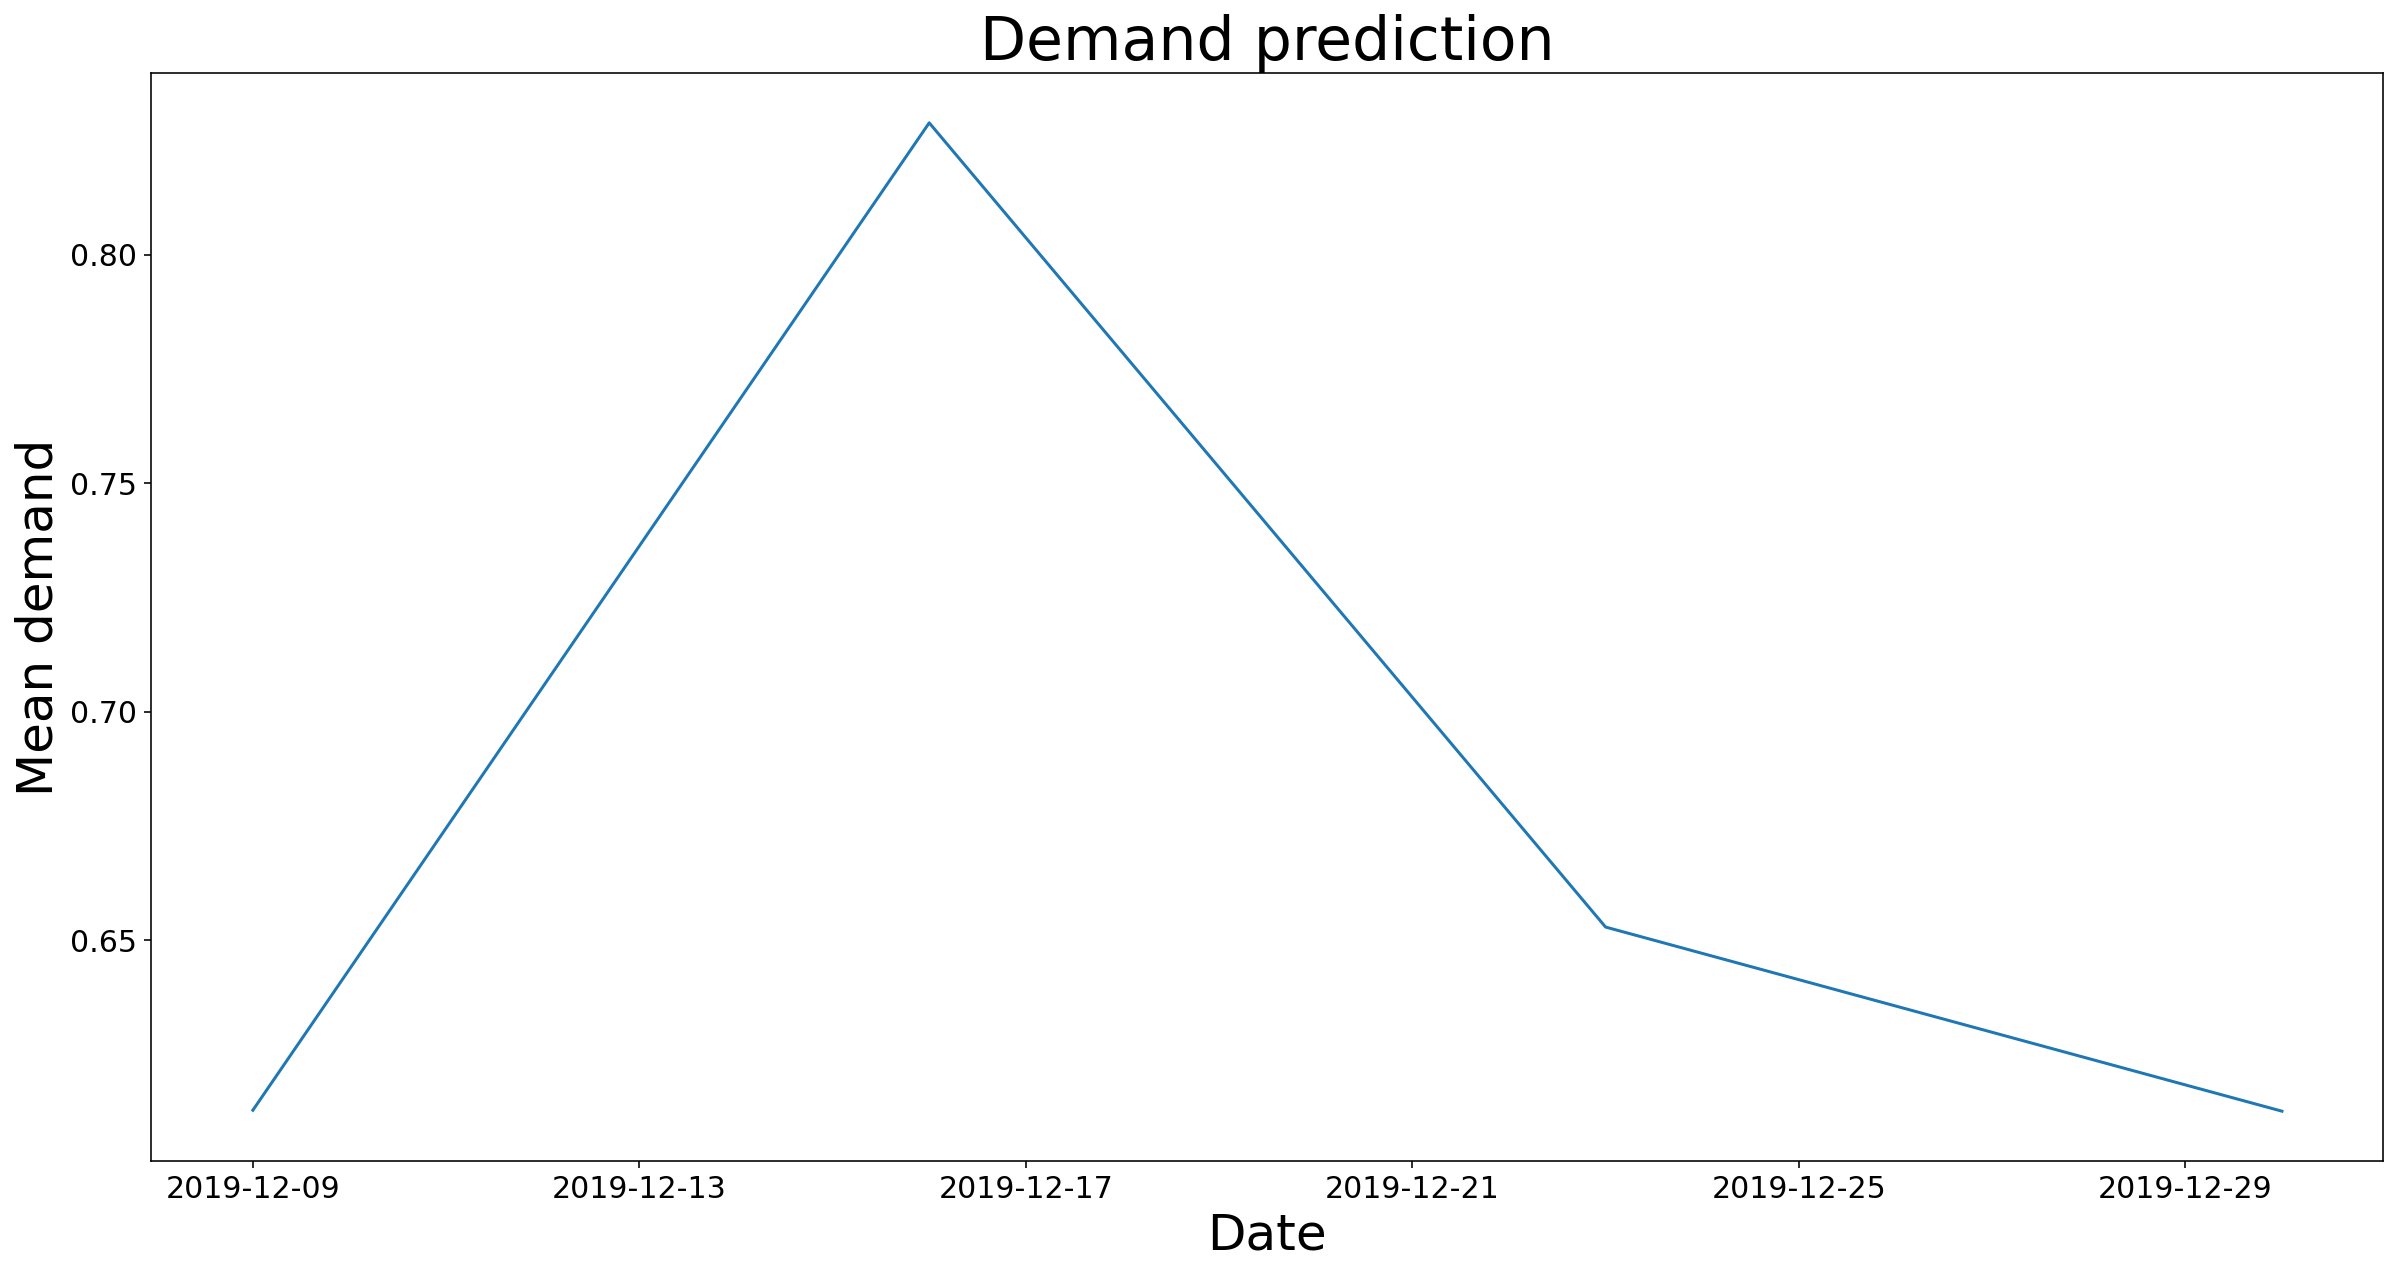

In [49]:
demand_prediction_ = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [50]:
test_['demand'] = test_['demand'].apply(lambda x: 0 if x < 0.25 else x)
test_['demand'] = test_['demand'].apply(lambda x: 1 if x >= 0.25 and x <= 1.75 else x)

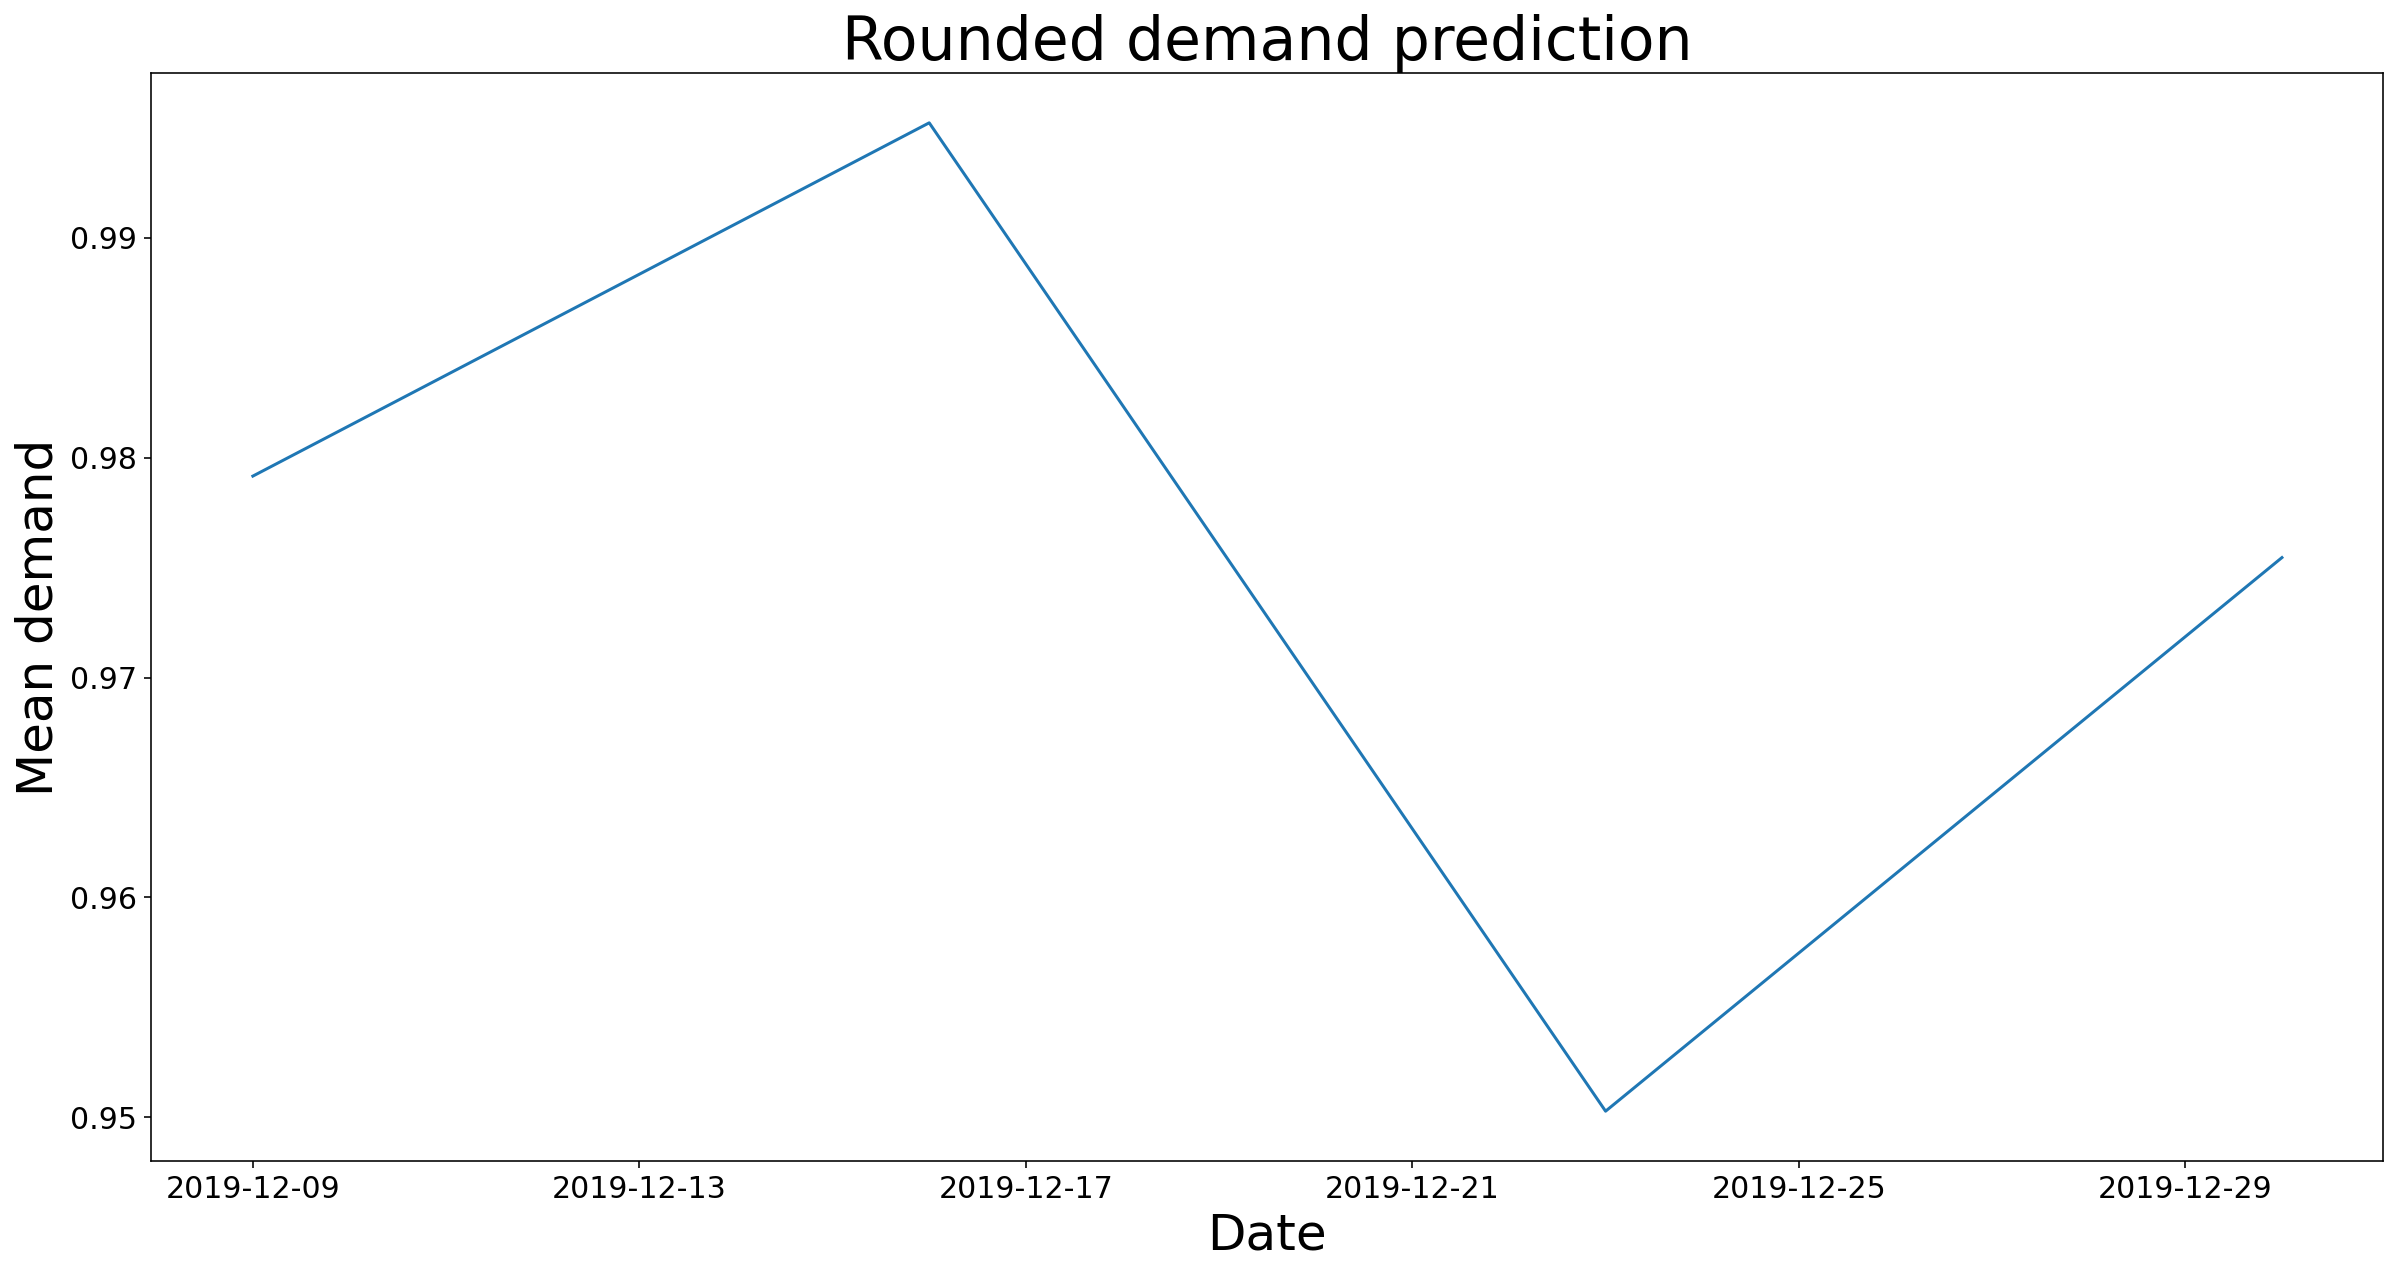

In [51]:
demand_prediction_rounded = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_rounded, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Rounded demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [52]:
test_['demand'] = np.where((test_['period_dt'] == dt.date(2019, 12, 16)) | (test_['period_dt'] == dt.date(2019, 12, 23)), np.maximum(1, test_['demand']), test_['demand'])

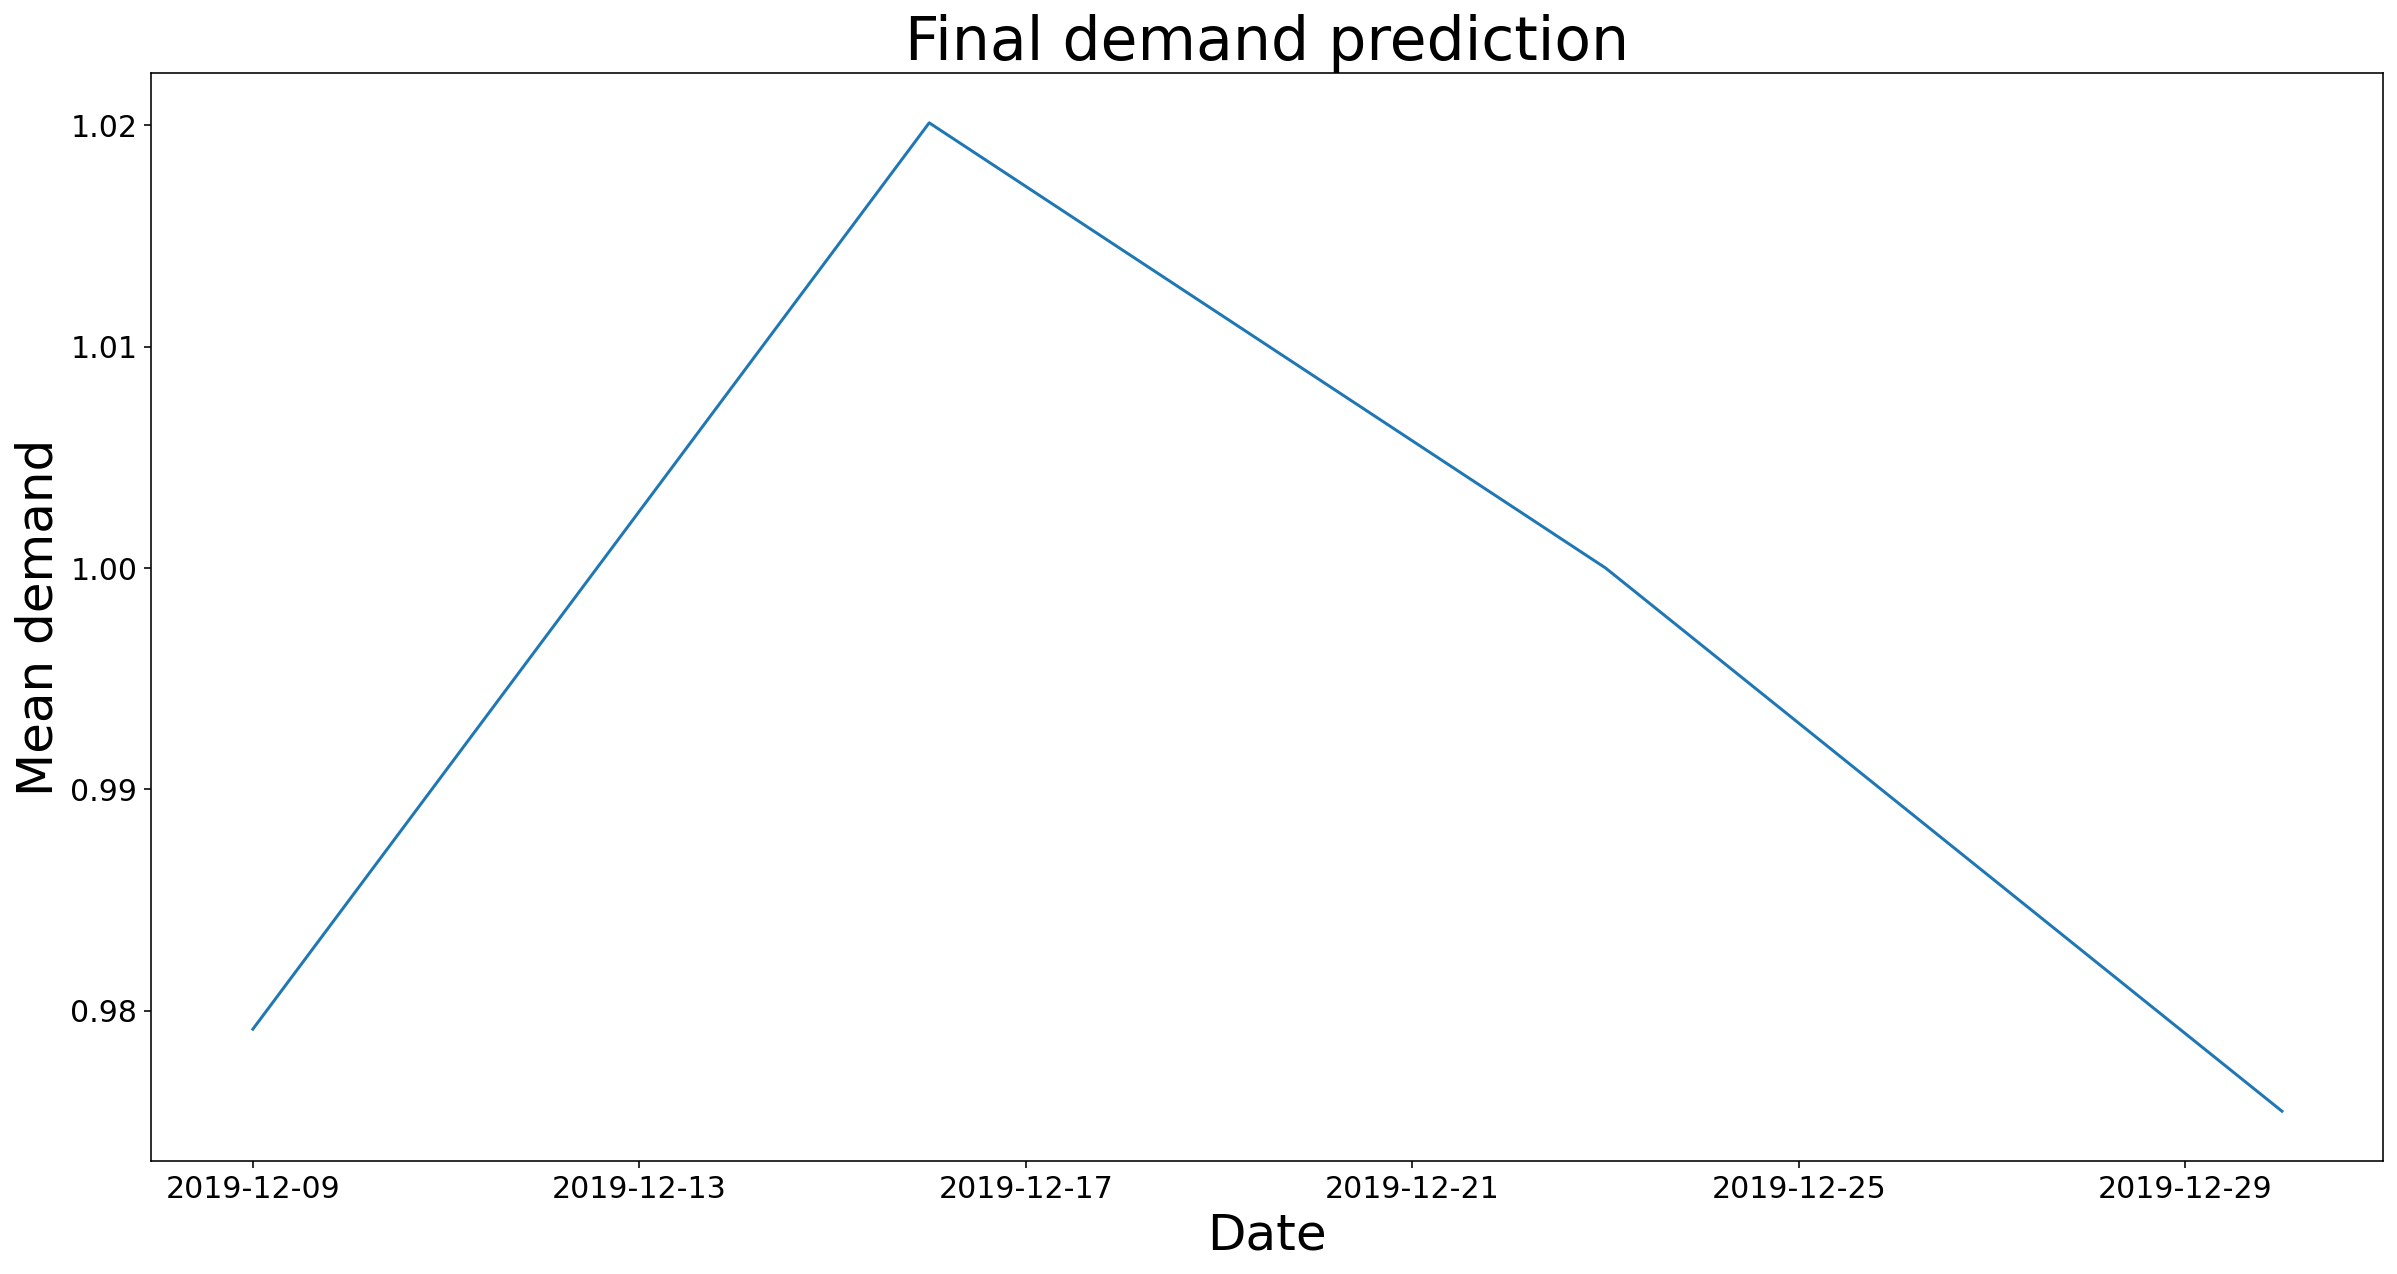

In [53]:
demand_prediction_final = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_final, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Final demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [54]:
answer_df = test_[['id', 'demand']]
answer_df.to_csv('out.csv', index=False)

### Maybe we should compute ARIMA predictions based on each location zone and product category. ###

In [55]:
location_zone_demand = train_.groupby(['location_zone_1', 'period_dt'])['demand'].mean().reset_index()
location_zone_pred = dict()

for location_zone in test_['location_zone_1'].unique():
    cur_location_zone_demand = location_zone_demand[location_zone_demand['location_zone_1'] == location_zone]
    model = auto_arima(cur_location_zone_demand['demand'].to_list(), test='adf', seasonal=True, m=52, scoring='mae')
    future_pred = model.predict(period)
    date_pred = dict(zip(future_dates, future_pred))
    location_zone_pred[location_zone] = date_pred

In [57]:
product_category_demand = train_.groupby(['product_category_1', 'period_dt'])['demand'].mean().reset_index()
product_category_pred = dict()

for product_category in test_['product_category_1'].unique():
    if product_category != 3885:
        cur_product_category_demand = product_category_demand[product_category_demand['product_category_1'] == product_category]
        model = auto_arima(cur_product_category_demand['demand'].to_list(), test='adf', seasonal=True, m=52, scoring='mae')
        future_pred = model.predict(period)
        date_pred = dict(zip(future_dates, future_pred))
        product_category_pred[product_category] = date_pred

In [58]:
product_category_pred[3885] = dict(zip(future_dates, [np.nan]*4))
test_['nearest_shops_demand_ARIMA'] = np.nan
test_['nearest_products_demand_ARIMA'] = np.nan

In [59]:
test_['nearest_shops_demand_ARIMA'] = test_.apply(lambda x: location_zone_pred[x['location_zone_1']][x['period_dt']], axis=1)
test_['nearest_products_demand_ARIMA'] = test_.apply(lambda x: product_category_pred[x['product_category_1']][x['period_dt']], axis=1)

In [60]:
print(test_['nearest_shops_demand_ARIMA'].isnull().sum())
print(test_['nearest_products_demand_ARIMA'].isnull().sum())

0
84


In [61]:
test_['nearest_products_demand_ARIMA'] = np.where(test_['nearest_products_demand_ARIMA'].isnull(), test_['nearest_shops_demand_ARIMA'], test_['nearest_products_demand_ARIMA'])
test_['demand_ARIMA_'] = 0.5 * test_['nearest_shops_demand_ARIMA'] + 0.5 * test_['nearest_products_demand_ARIMA']

In [62]:
test_['demand'] = 0.75 * test_['demand_3_weeks'] + 0.25 * test_['demand_ARIMA_']

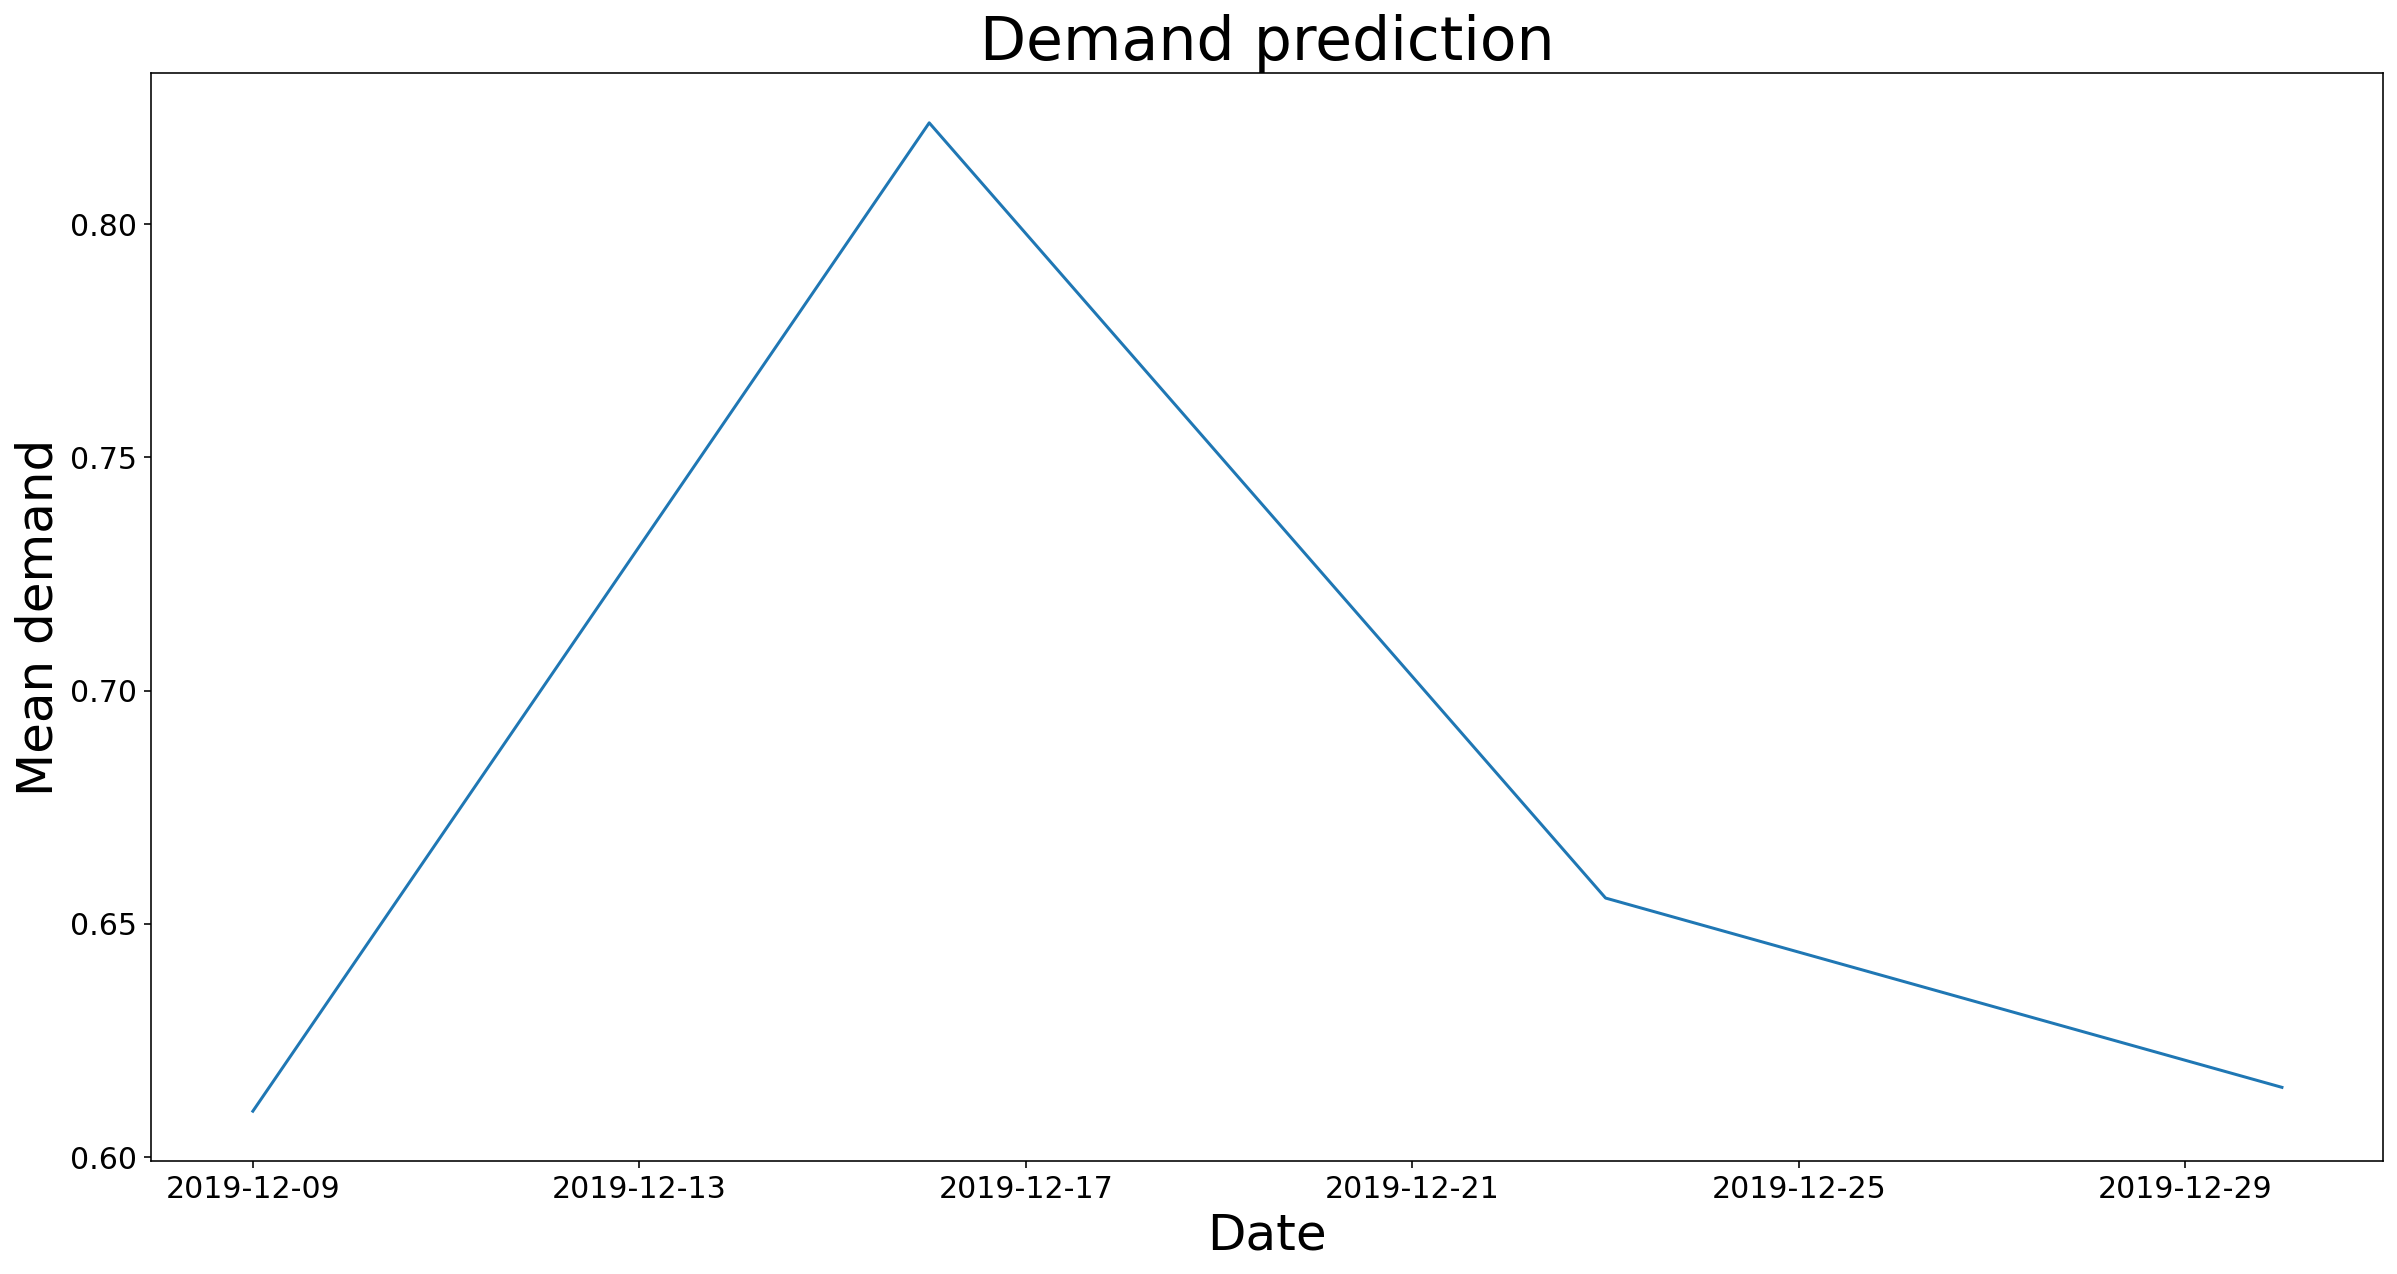

In [63]:
demand_prediction = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [64]:
test_['demand'] = test_['demand'].apply(lambda x: 0 if x < 0.25 else x)
test_['demand'] = test_['demand'].apply(lambda x: 1 if x >= 0.25 and x <= 1.75 else x)

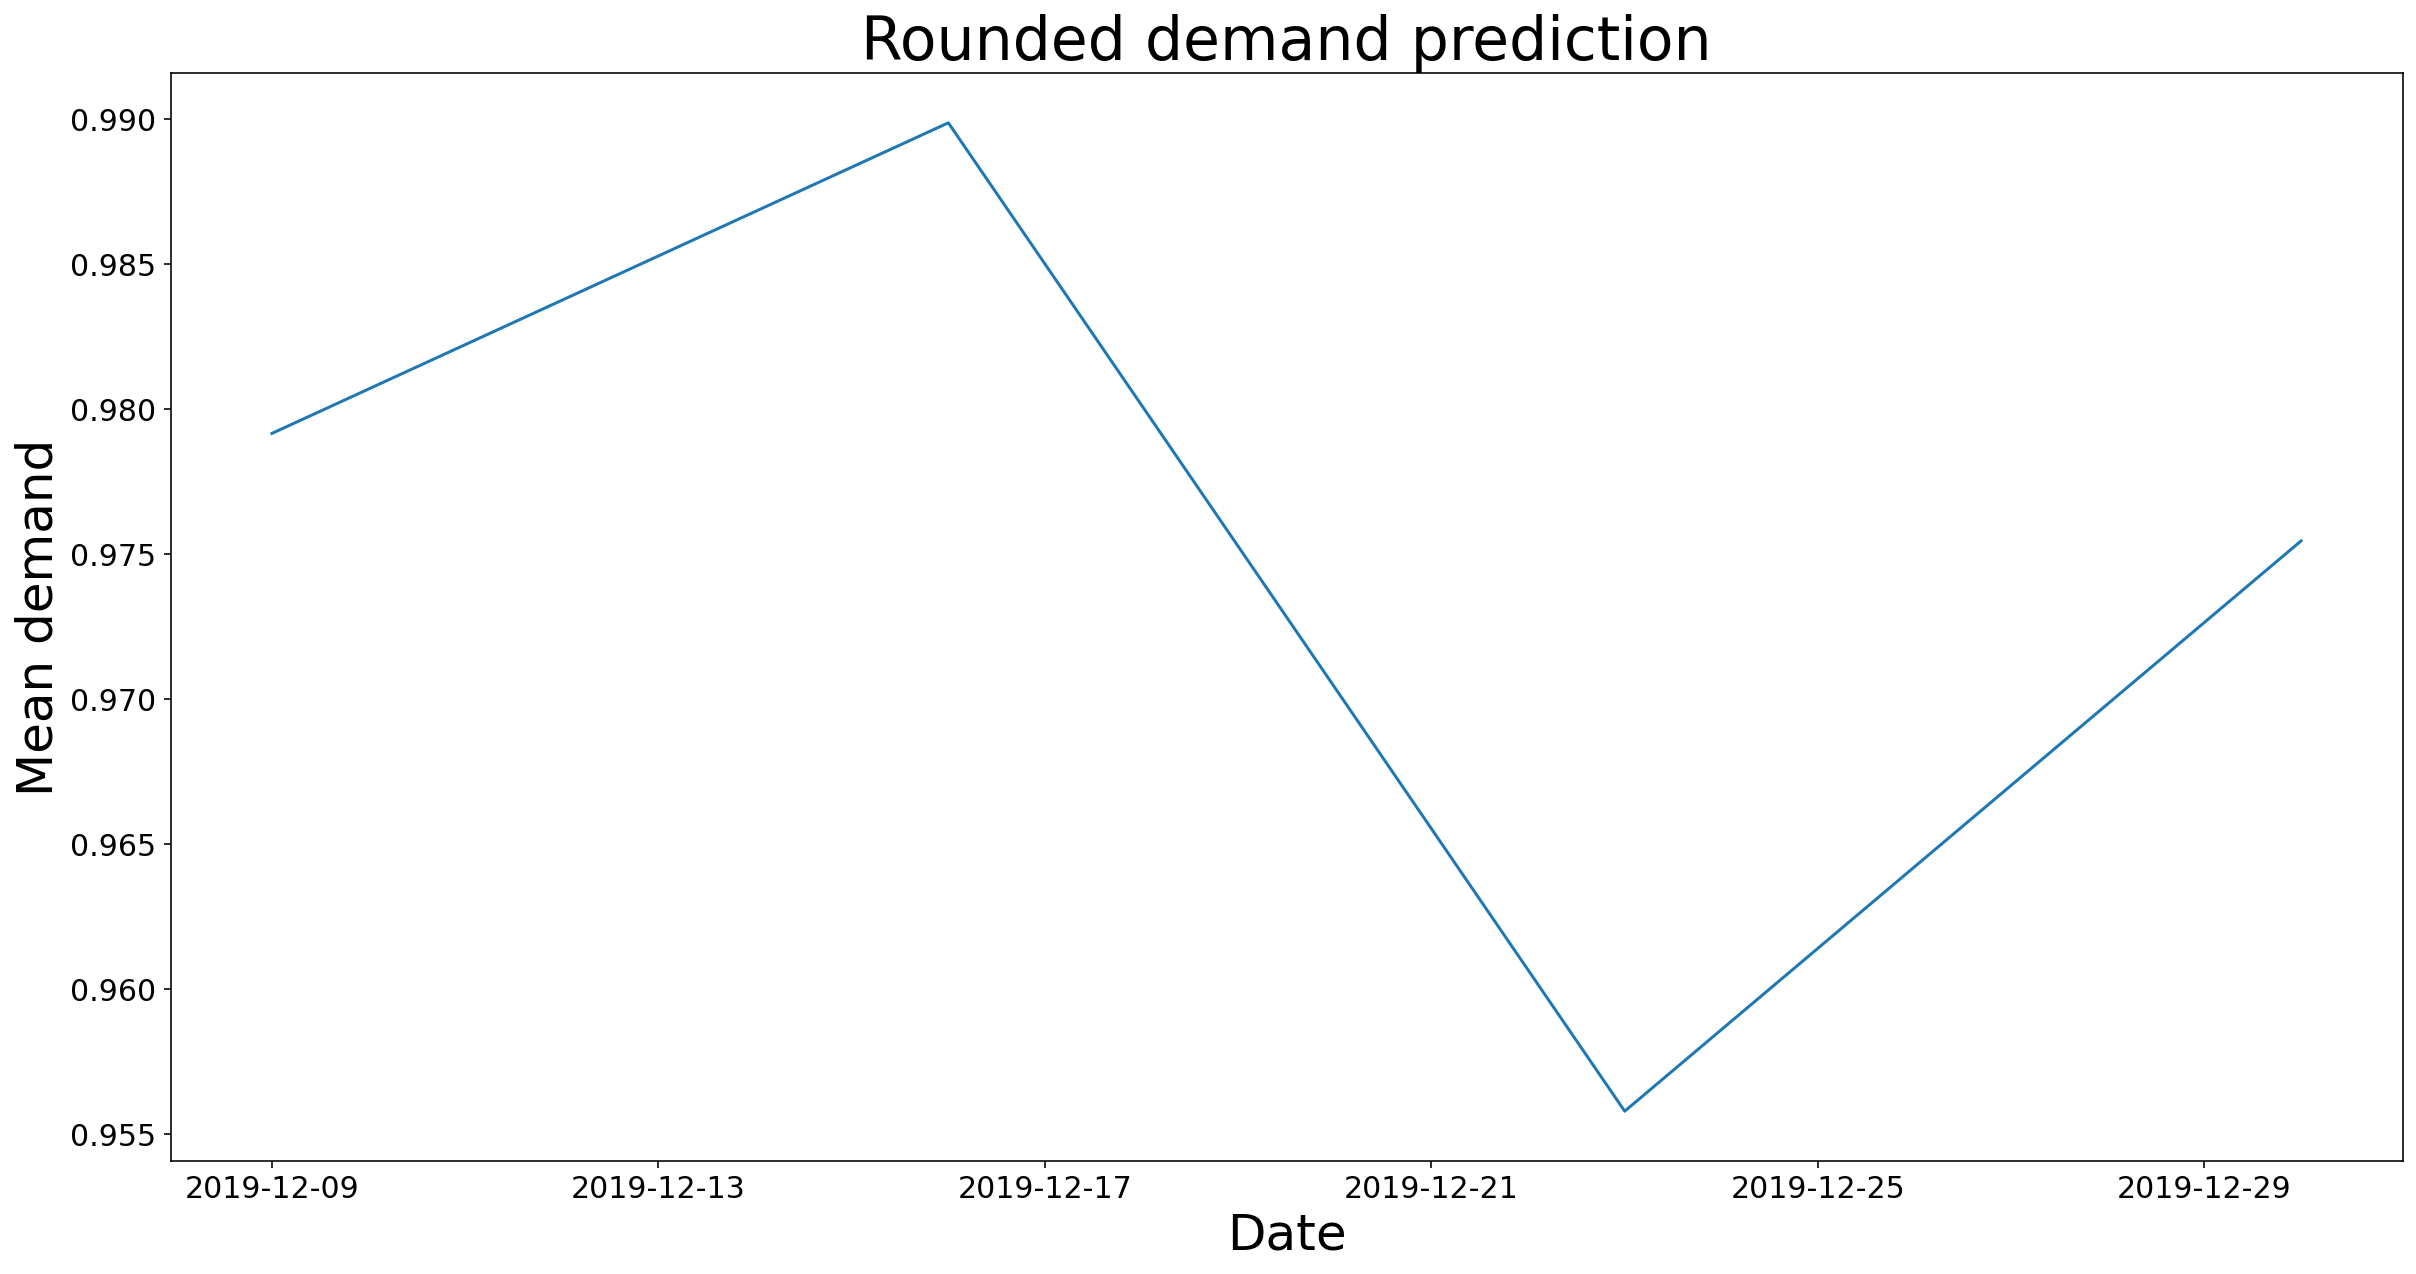

In [65]:
demand_prediction_rounded = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_rounded, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Rounded demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [66]:
test_['demand'] = np.where((test_['period_dt'] == dt.date(2019, 12, 16)) | (test_['period_dt'] == dt.date(2019, 12, 23)), np.maximum(1, test_['demand']), test_['demand'])

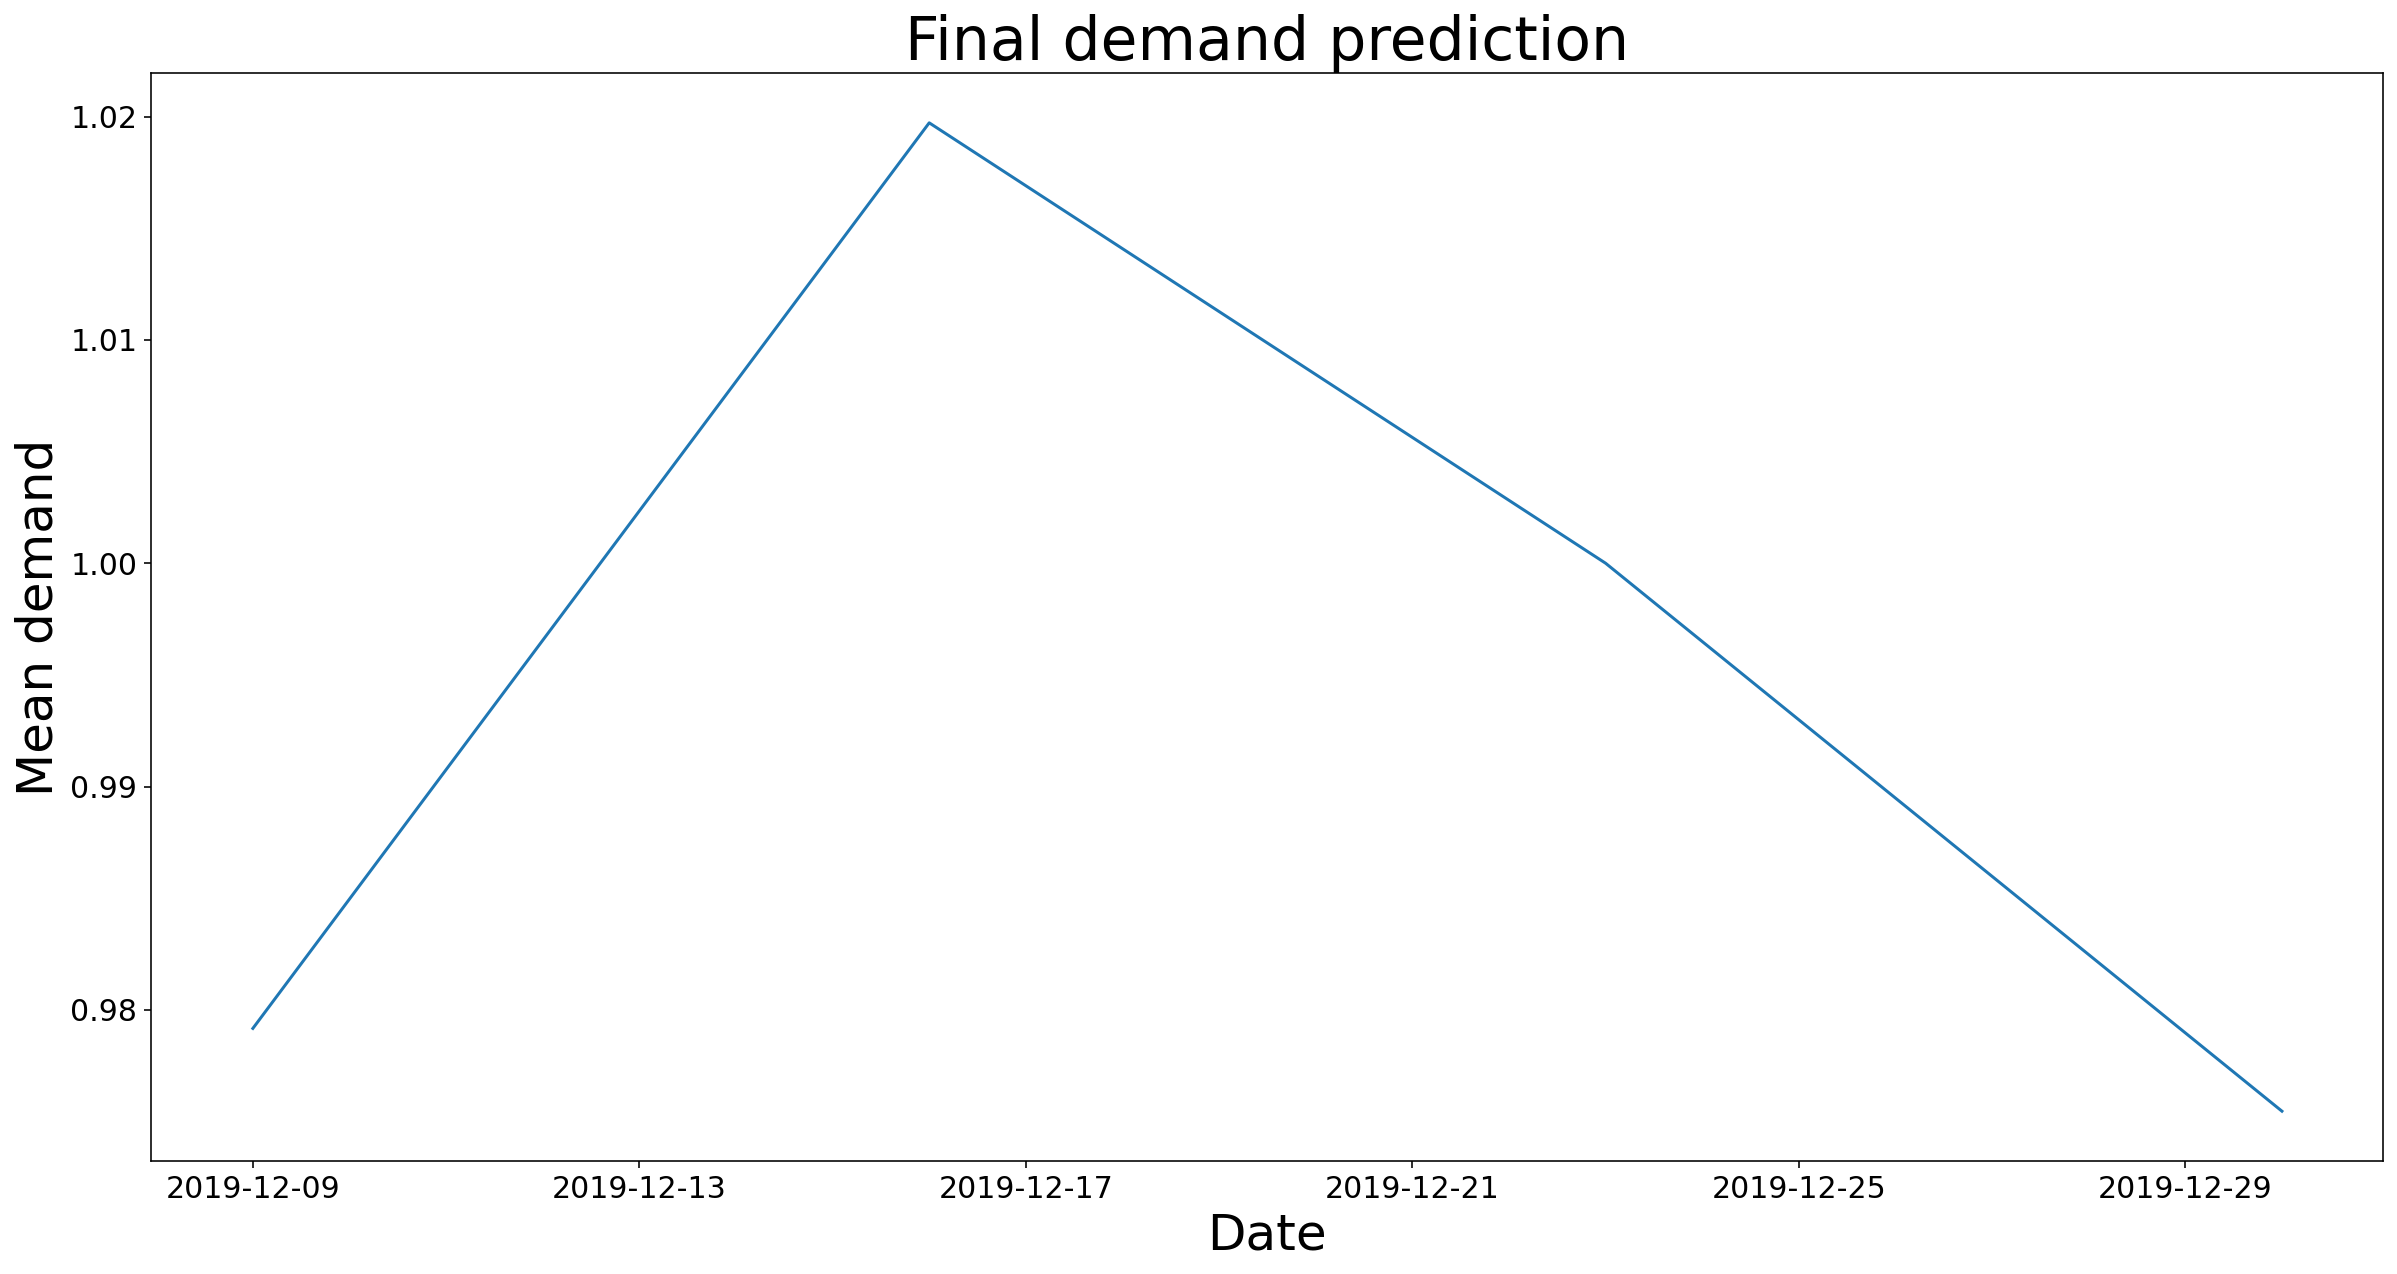

In [67]:
demand_prediction_final = test_.groupby(['period_dt'])['demand'].mean().reset_index()
sns.lineplot(data=demand_prediction_final, x='period_dt', y='demand')
plt.xlabel("Date", fontsize = 25)
plt.ylabel("Mean demand", fontsize = 25)
plt.title("Final demand prediction", fontsize = 30)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [68]:
answer_df = test_[['id', 'demand']]
answer_df.to_csv('out.csv', index=False)